# Time Series Data Validation Demo

## Introduction

The Time Series Data Validation Demo notebook aims to demonstrate the application of various data validation tests using the **ValidMind MRM Platform** and **Developer Framework**. As model developers working in the financial sector, ensuring the quality and reliability of time series data is essential for accurate model predictions and robust decision-making processes.

In this demo, we will walk through different data validation suites of tests tailored for time series data, showcasing how these tools can assist you in identifying potential issues and inconsistencies in the data. By utilizing the ValidMind MRM platform and developer framework, you can streamline your data validation process, allowing you to focus on building and refining your models with confidence.

Let's get started! 

## Setup 

Prepare the environment for our analysis. First, import all necessary libraries and modules required for our analysis. Next, define and configure the specific use case we are working on by setting up any required parameters, data sources, or other settings that will be used throughout the analysis. Finally, establish a connection to the ValidMind MRM platform, which provides a comprehensive suite of tools and services for model validation.

### Import Libraries

In [4]:
# Load API key and secret from environment variables
from dotenv import load_dotenv
load_dotenv()

# System libraries
import glob
import os
import pickle

# ML libraries
import pandas as pd

# ValidMind libraries 
import validmind as vm

### Use Case Configuration

In [5]:
from validmind.datasets.regression import fred
iris_df = fred.load_data()

In [6]:
dataset = 'lending_club'

if dataset == 'lending_club':
    target_column = ['loan_rate_A']
    feature_columns = ['loan_rate_B', 'loan_rate_C', 'loan_rate_D']
    from validmind.datasets.regression import lending_club
    raw_df = lending_club.load_data()
if dataset == 'fred':
    target_column = ['MORTGAGE30US']
    feature_columns = ['FEDFUNDS', 'GS10', 'UNRATE']
    from validmind.datasets.regression import fred
    raw_df = fred.load_data()
    selected_cols = target_column + feature_columns
    raw_df = raw_df[selected_cols]

### Connect to ValidMind MRM Platform

In [7]:
vm.init(
  api_host = "http://localhost:3000/api/v1/tracking",
  api_key = "e22b89a6b9c2a27da47cb0a09febc001",
  api_secret = "a61be901b5596e3c528d94231e4a3c504ef0bb803d16815f8dfd6857fac03e57",
  project = "clgo0g0rt0000fjy6ozl9pb69"
)

Connected to ValidMind


## Data Description

In [8]:
display(raw_df)

,loan_rate_A,loan_rate_B,loan_rate_C,loan_rate_D
DATE,,,,
2007-08-01,7.766667,9.497692,10.947500,12.267000
2007-09-01,7.841429,9.276667,10.829167,12.436667
2007-10-01,7.830000,9.433333,10.825926,12.737368
2007-11-01,7.779091,9.467778,10.967037,12.609444
2007-12-01,7.695833,9.387500,10.805000,12.478889
...,...,...,...,...
2018-08-01,7.218997,11.161286,15.142618,19.857603
2018-09-01,7.201281,11.191918,15.139769,19.748459
2018-10-01,7.228498,11.208418,15.129105,19.792163


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 2007-08-01 to 2018-12-01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_rate_A  137 non-null    float64
 1   loan_rate_B  137 non-null    float64
 2   loan_rate_C  137 non-null    float64
 3   loan_rate_D  137 non-null    float64
dtypes: float64(4)
memory usage: 5.4 KB


## Data Preparation

### List of Available Test Plans

The `vm.test_plans.list_plans()` function is a part of the ValidMind (`vm`) library that provides a comprehensive list of available test plans. These test plans are pre-built sets of tests designed to perform automated data and model validation, such as data quality, exploratory data analysis, and model performance.

In [10]:
vm.test_plans.list_plans()

ID,Name,Description
sklearn_classifier_metrics,SKLearnClassifierMetrics,Test plan for sklearn classifier metrics
sklearn_classifier_validation,SKLearnClassifierPerformance,Test plan for sklearn classifier models
sklearn_classifier_model_diagnosis,SKLearnClassifierDiagnosis,Test plan for sklearn classifier model diagnosis tests
sklearn_classifier,SKLearnClassifier,Test plan for sklearn classifier models that includes both metrics and validation tests
tabular_dataset,TabularDataset,Test plan for generic tabular datasets
tabular_dataset_description,TabularDatasetDescription,Test plan to extract metadata and descriptive statistics from a tabular dataset
tabular_data_quality,TabularDataQuality,Test plan for data quality on tabular datasets
normality_test_plan,NormalityTestPlan,Test plan to perform normality tests.
autocorrelation_test_plan,AutocorrelationTestPlan,Test plan to perform autocorrelation tests.
seasonality_test_plan,SesonalityTestPlan,Test plan to perform seasonality tests.


### Data Quality

#### Run Data Quality Test Plan

Use the ValidMind (`vm`) library to perform data quality tests on a time series dataset. The process begins by describing a test plan specifically designed for time series data quality. This test plan contains a set of tests that evaluate the quality of the provided time series data.

Next, the raw DataFrame is used to initialize a dataset using the vm library. This newly created dataset object, `vm_dataset`, is then utilized for further processing. The test plan parameters are configured to define the z-score threshold for outlier detection and the minimum threshold for identifying missing values.

Finally, the test plan, `time_series_data_quality`, is executed using the `vm.run_test_plan()` function with the initialized dataset and the configuration settings provided. This function applies the specified tests to the dataset and generates a report on the quality of the time series data based on the configured parameters.

In [11]:
vm.test_plans.describe_plan("time_series_data_quality")

Attribute,Value
ID,time_series_data_quality
Name,TimeSeriesDataQuality
Description,Test plan for data quality on time series datasets
Required Context,['dataset']
Tests,"TimeSeriesOutliers (ThresholdTest), TimeSeriesMissingValues (ThresholdTest), TimeSeriesFrequency (ThresholdTest)"
Test Plans,[]


Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


Running ThresholdTest: time_series_outliers:   0%|          | 0/3 [00:00<?, ?it/s]  

Empty DataFrame
Columns: []
Index: []



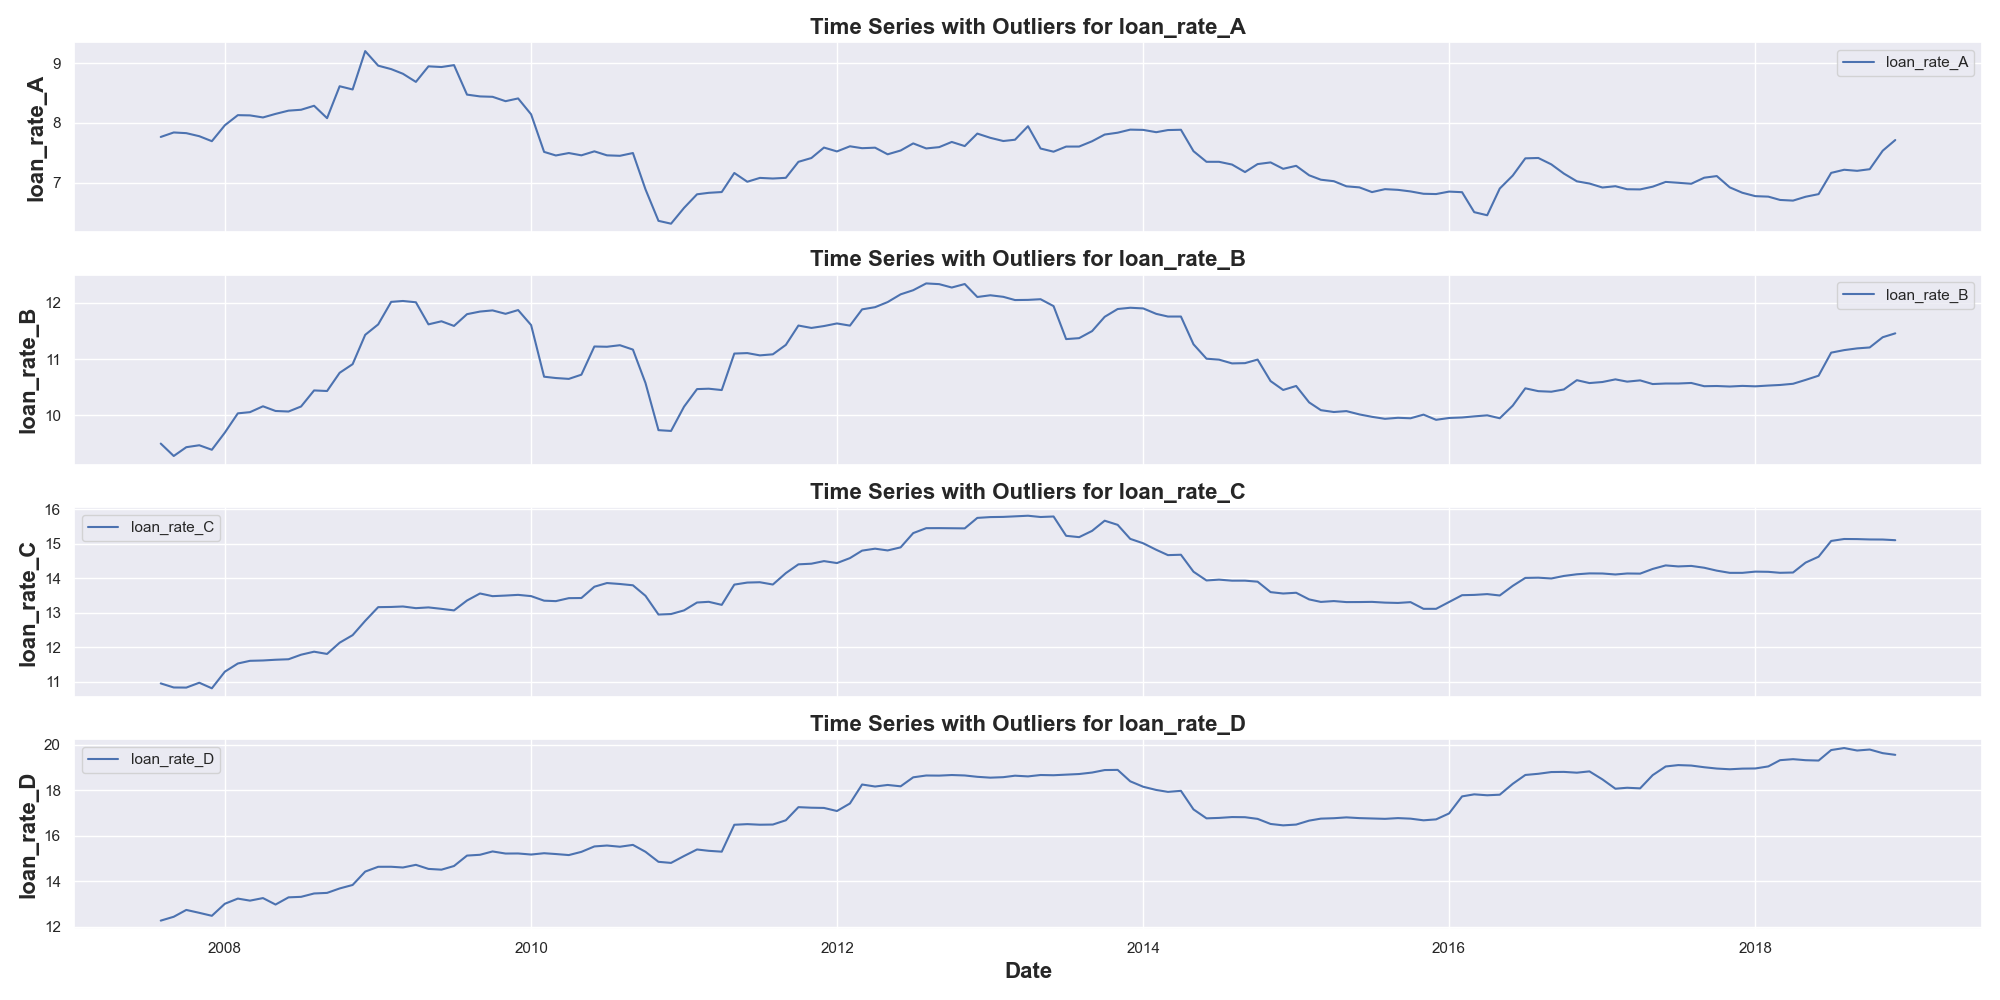
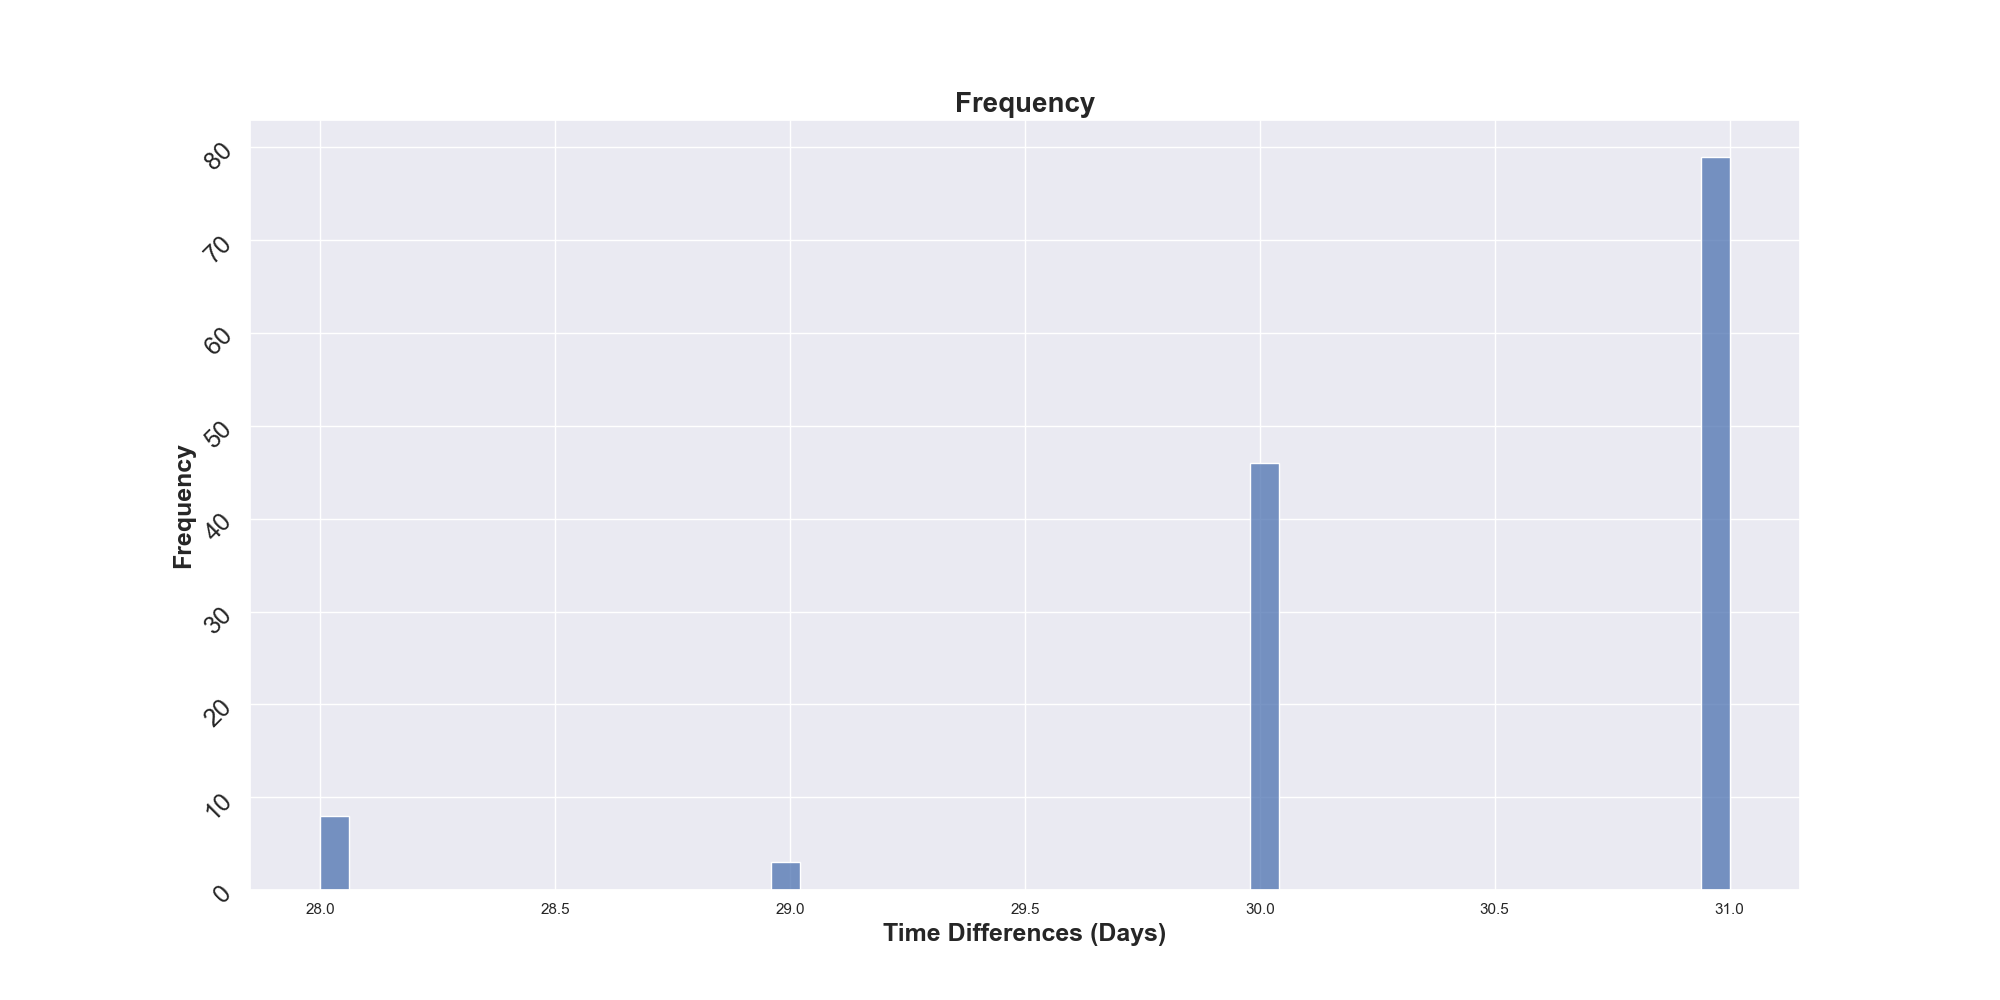

TimeSeriesDataQuality(test_context=TestContext(dataset=Dataset(raw_dataset=            loan_rate_A  loan_rate_B  loan_rate_C  loan_rate_D
DATE                                                          
2007-08-01     7.766667     9.497692    10.947500    12.267000
2007-09-01     7.841429     9.276667    10.829167    12.436667
2007-10-01     7.830000     9.433333    10.825926    12.737368
2007-11-01     7.779091     9.467778    10.967037    12.609444
2007-12-01     7.695833     9.387500    10.805000    12.478889
...                 ...          ...          ...          ...
2018-08-01     7.218997    11.161286    15.142618    19.857603
2018-09-01     7.201281    11.191918    15.139769    19.748459
2018-10-01     7.228498    11.208418    15.129105    19.792163
2018-11-01     7.536897    11.390483    15.126869    19.632697
2018-12-01     7.715209    11.459631    15.107476    19.558346

[137 rows x 4 columns], fields=[{'id': 'loan_rate_A', 'type': 'Numeric'}, {'id': 'loan_rate_B', 'type': '

In [12]:
vm_dataset = vm.init_dataset(
    dataset=raw_df
)

config={
    "time_series_outliers": {
        "zscore_threshold": 3,

    },
    "time_series_missing_values":{
        "min_threshold": 2,
    }
}

vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

Handling Frequencies.

In [13]:
def identify_frequencies(df):
    """
    Identify the frequency of each series in the DataFrame.

    :param df: Time-series DataFrame
    :return: DataFrame with two columns: 'Variable' and 'Frequency'
    """
    frequencies = []
    for column in df.columns:
        series = df[column].dropna()
        if not series.empty:
            freq = pd.infer_freq(series.index)
            if freq == 'MS' or freq == 'M':
                label = 'Monthly'
            elif freq == 'Q':
                label = 'Quarterly'
            elif freq == 'A':
                label = 'Yearly'
            else:
                label = freq
        else:
            label = None

        frequencies.append({'Variable': column, 'Frequency': label})

    freq_df = pd.DataFrame(frequencies)

    return freq_df

In [14]:
frequencies = identify_frequencies(raw_df)
display(frequencies)

,Variable,Frequency
0,loan_rate_A,Monthly
1,loan_rate_B,Monthly
2,loan_rate_C,Monthly
3,loan_rate_D,Monthly


Resample.

In [15]:
preprocessed_df = raw_df.resample('MS').last()
frequencies = identify_frequencies(preprocessed_df)
display(frequencies)

,Variable,Frequency
0,loan_rate_A,Monthly
1,loan_rate_B,Monthly
2,loan_rate_C,Monthly
3,loan_rate_D,Monthly


Run Data Quality Test Plan.

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


Running ThresholdTest: time_series_missing_values:  33%|███▎      | 1/3 [00:00<00:00,  5.49it/s]

Empty DataFrame
Columns: []
Index: []



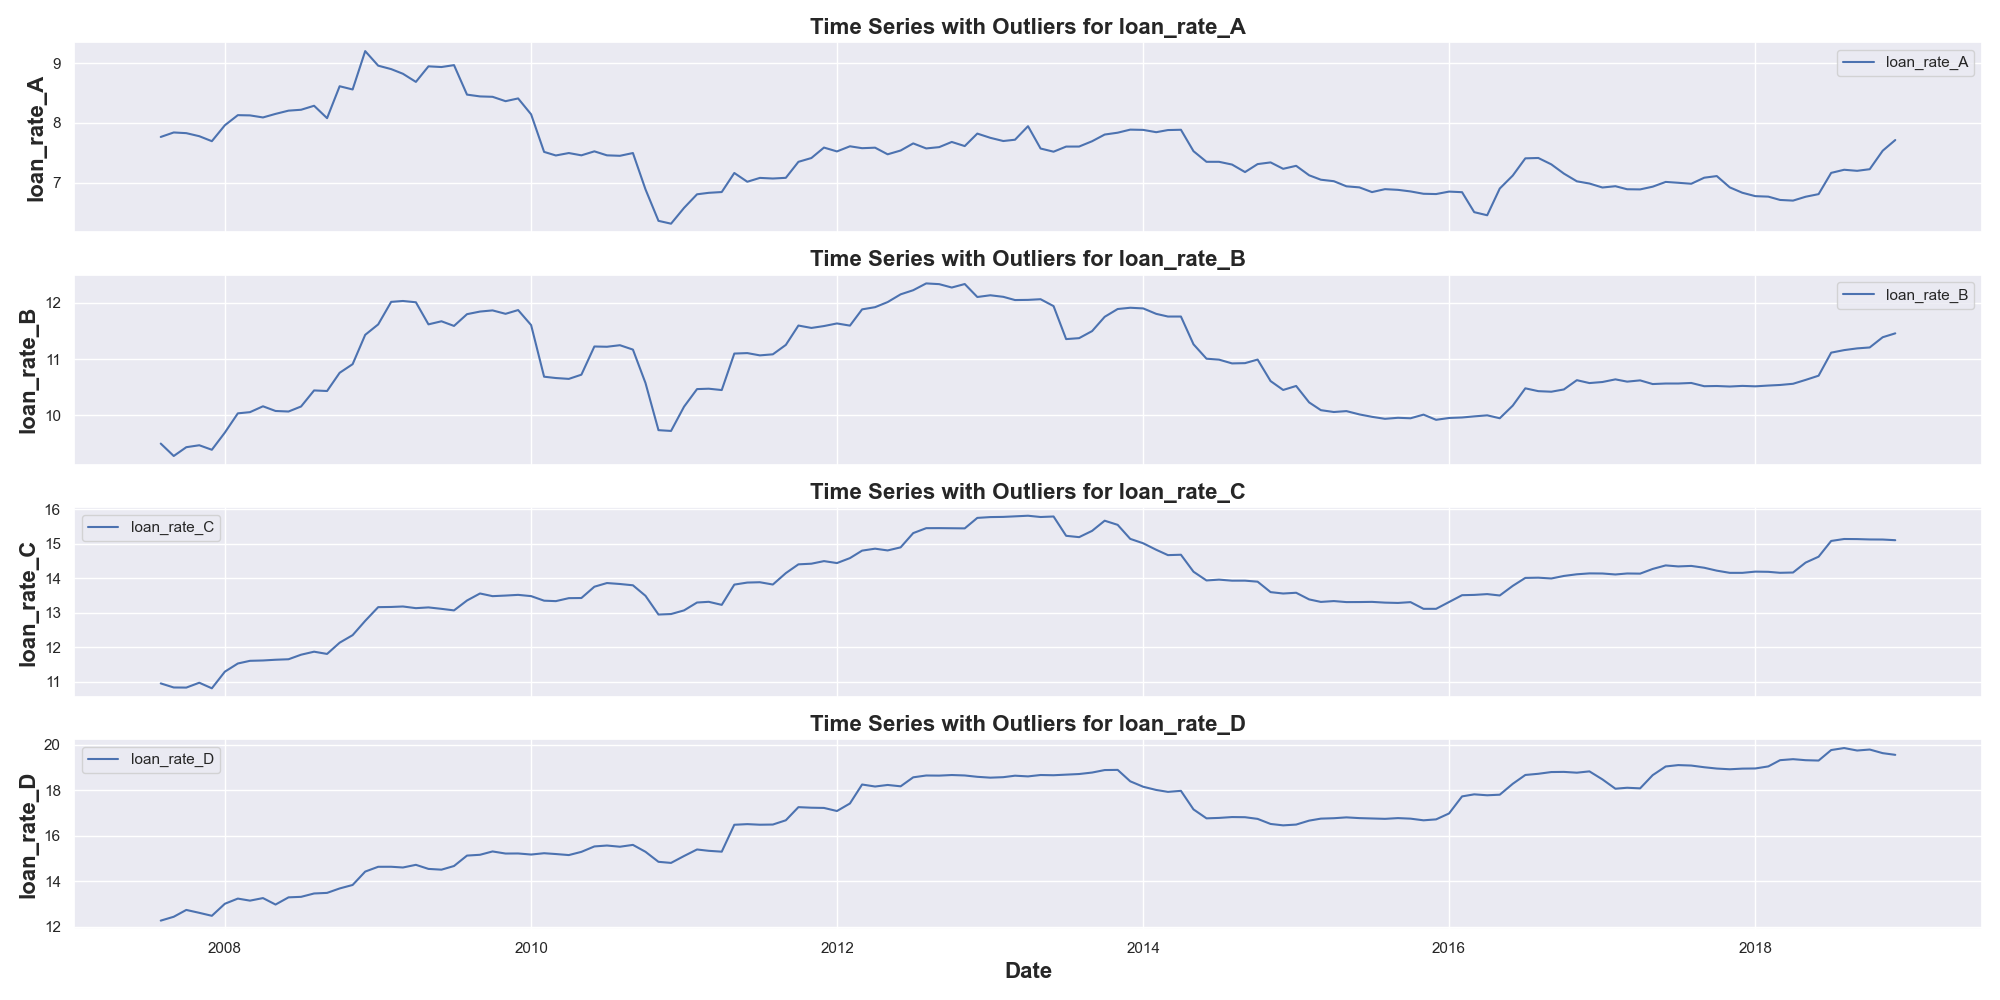
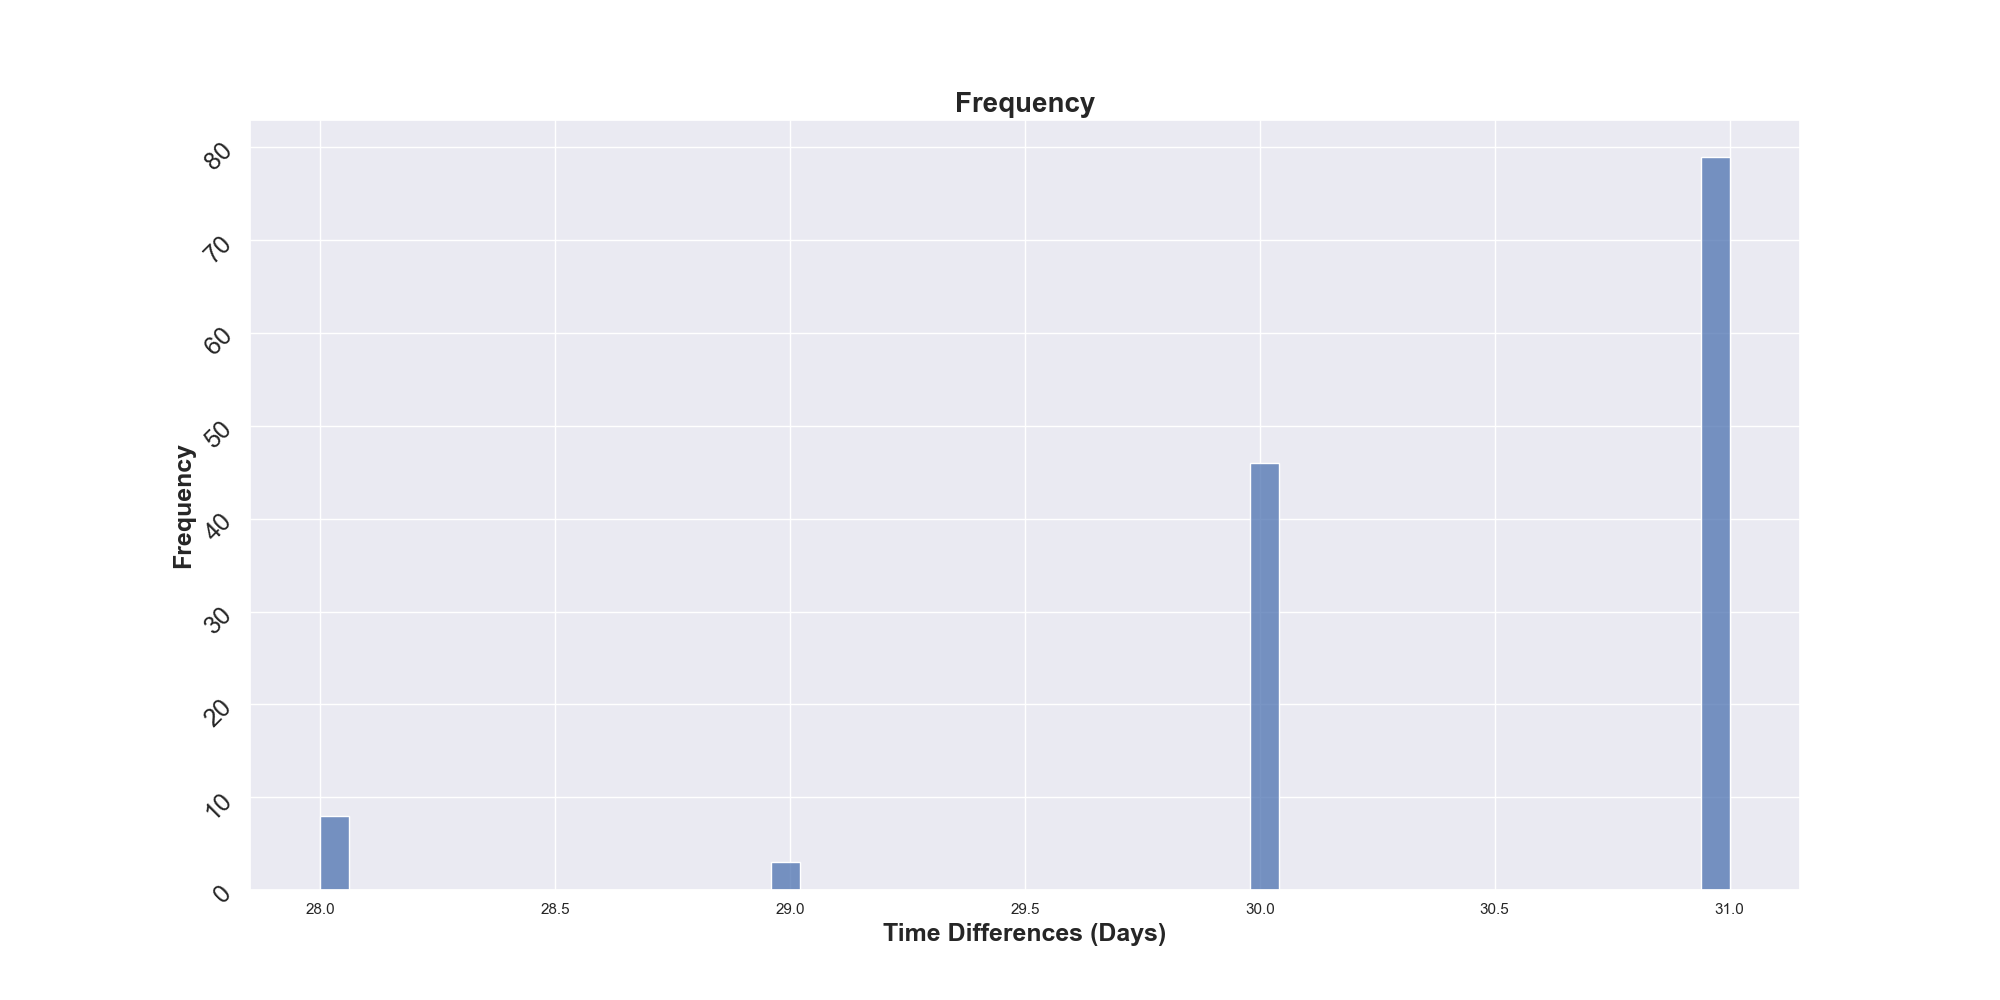

TimeSeriesDataQuality(test_context=TestContext(dataset=Dataset(raw_dataset=            loan_rate_A  loan_rate_B  loan_rate_C  loan_rate_D
DATE                                                          
2007-08-01     7.766667     9.497692    10.947500    12.267000
2007-09-01     7.841429     9.276667    10.829167    12.436667
2007-10-01     7.830000     9.433333    10.825926    12.737368
2007-11-01     7.779091     9.467778    10.967037    12.609444
2007-12-01     7.695833     9.387500    10.805000    12.478889
...                 ...          ...          ...          ...
2018-08-01     7.218997    11.161286    15.142618    19.857603
2018-09-01     7.201281    11.191918    15.139769    19.748459
2018-10-01     7.228498    11.208418    15.129105    19.792163
2018-11-01     7.536897    11.390483    15.126869    19.632697
2018-12-01     7.715209    11.459631    15.107476    19.558346

[137 rows x 4 columns], fields=[{'id': 'loan_rate_A', 'type': 'Numeric'}, {'id': 'loan_rate_B', 'type': '

In [16]:
vm_dataset = vm.init_dataset(
    dataset=preprocessed_df
)
vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

Remove missing values.

In [17]:
preprocessed_df = preprocessed_df.dropna()

Run Data Quality Test Plan. 

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


Running ThresholdTest: time_series_missing_values:  33%|███▎      | 1/3 [00:00<00:00,  5.15it/s]

Empty DataFrame
Columns: []
Index: []



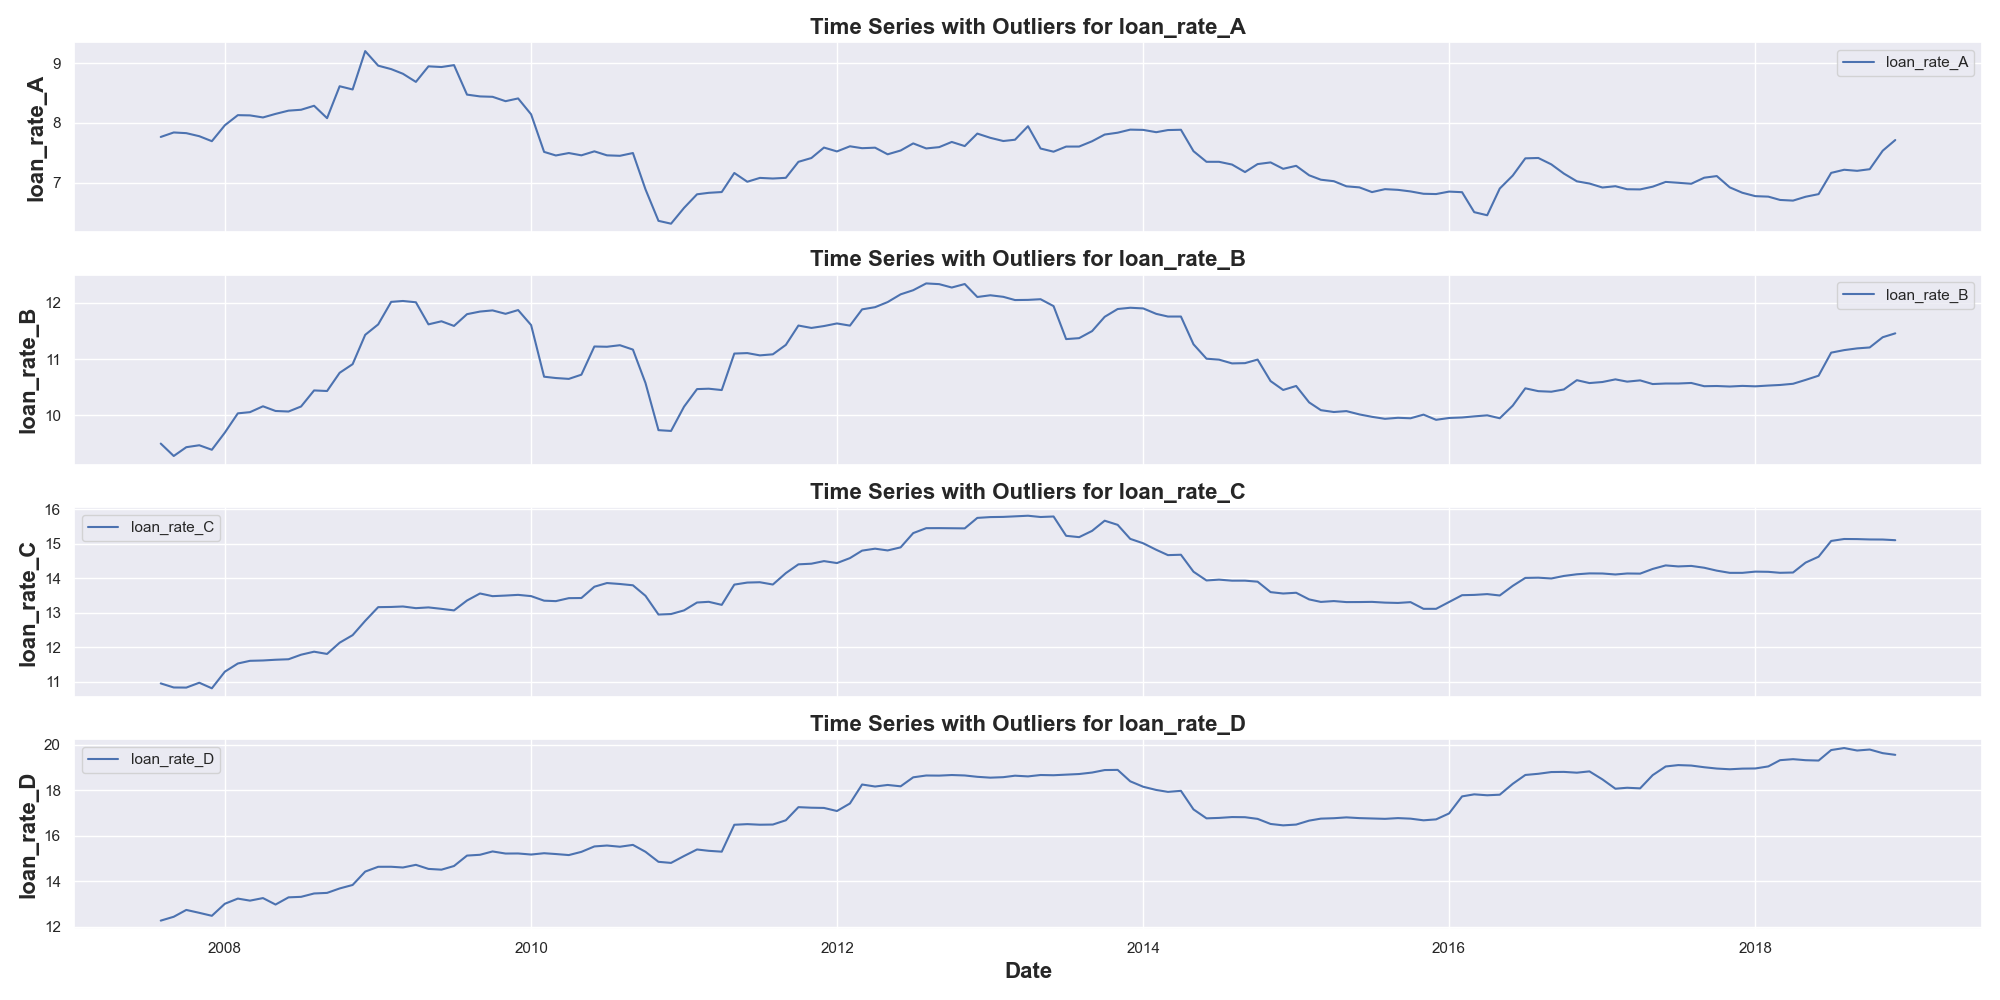
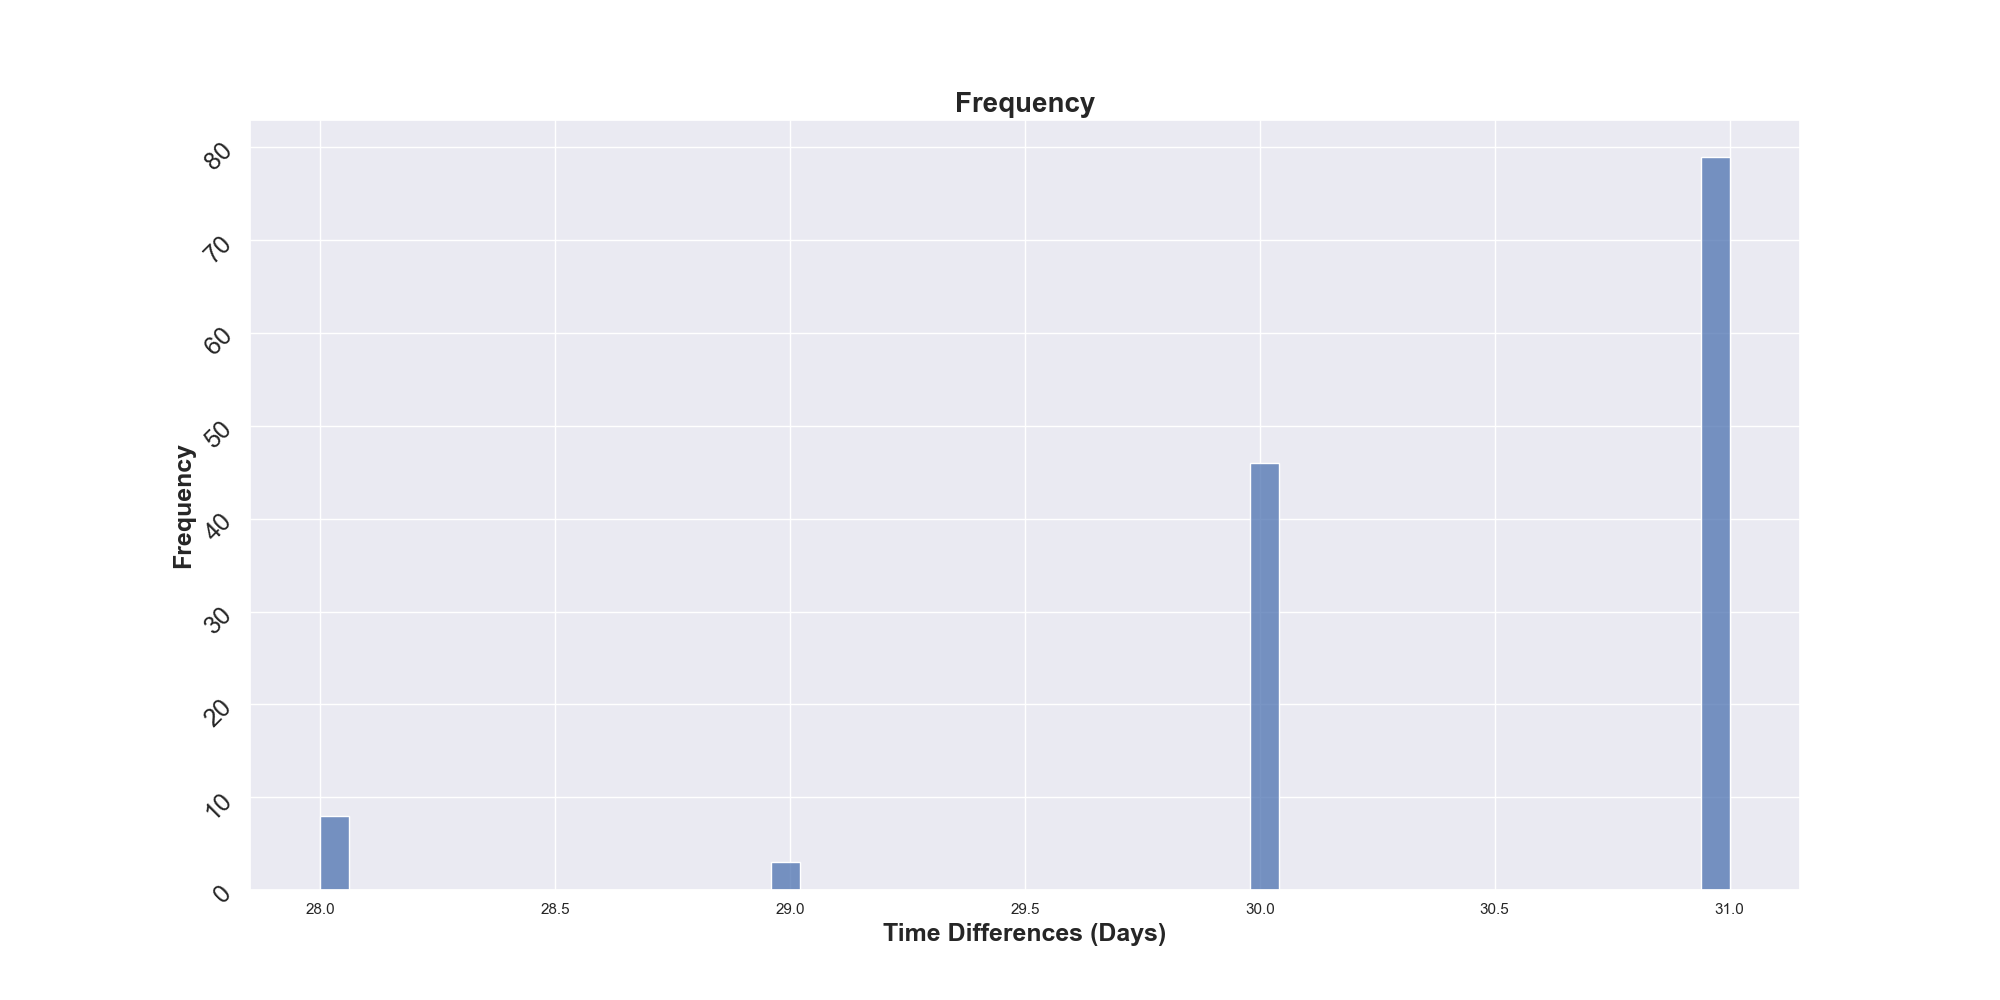

TimeSeriesDataQuality(test_context=TestContext(dataset=Dataset(raw_dataset=            loan_rate_A  loan_rate_B  loan_rate_C  loan_rate_D
DATE                                                          
2007-08-01     7.766667     9.497692    10.947500    12.267000
2007-09-01     7.841429     9.276667    10.829167    12.436667
2007-10-01     7.830000     9.433333    10.825926    12.737368
2007-11-01     7.779091     9.467778    10.967037    12.609444
2007-12-01     7.695833     9.387500    10.805000    12.478889
...                 ...          ...          ...          ...
2018-08-01     7.218997    11.161286    15.142618    19.857603
2018-09-01     7.201281    11.191918    15.139769    19.748459
2018-10-01     7.228498    11.208418    15.129105    19.792163
2018-11-01     7.536897    11.390483    15.126869    19.632697
2018-12-01     7.715209    11.459631    15.107476    19.558346

[137 rows x 4 columns], fields=[{'id': 'loan_rate_A', 'type': 'Numeric'}, {'id': 'loan_rate_B', 'type': '

In [18]:
vm_dataset = vm.init_dataset(
    dataset=preprocessed_df,
    target_column=target_column
)
vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

## Exploratory Data Analysis

### Univariate Analysis

#### Run Time Series Univariate Test Plan

In [19]:
vm.test_plans.describe_plan("time_series_univariate")

Attribute,Value
ID,time_series_univariate
Name,TimeSeriesUnivariate
Description,Test plan to perform time series univariate analysis.
Required Context,['dataset']
Tests,"TimeSeriesLinePlot (Metric), TimeSeriesHistogram (Metric), ACFandPACFPlot (Metric), RollingStatsPlot (Metric)"
Test Plans,[]


Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


Running Metric: acf_pacf_plot:  50%|█████     | 2/4 [00:00<00:00,  6.40it/s]        The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



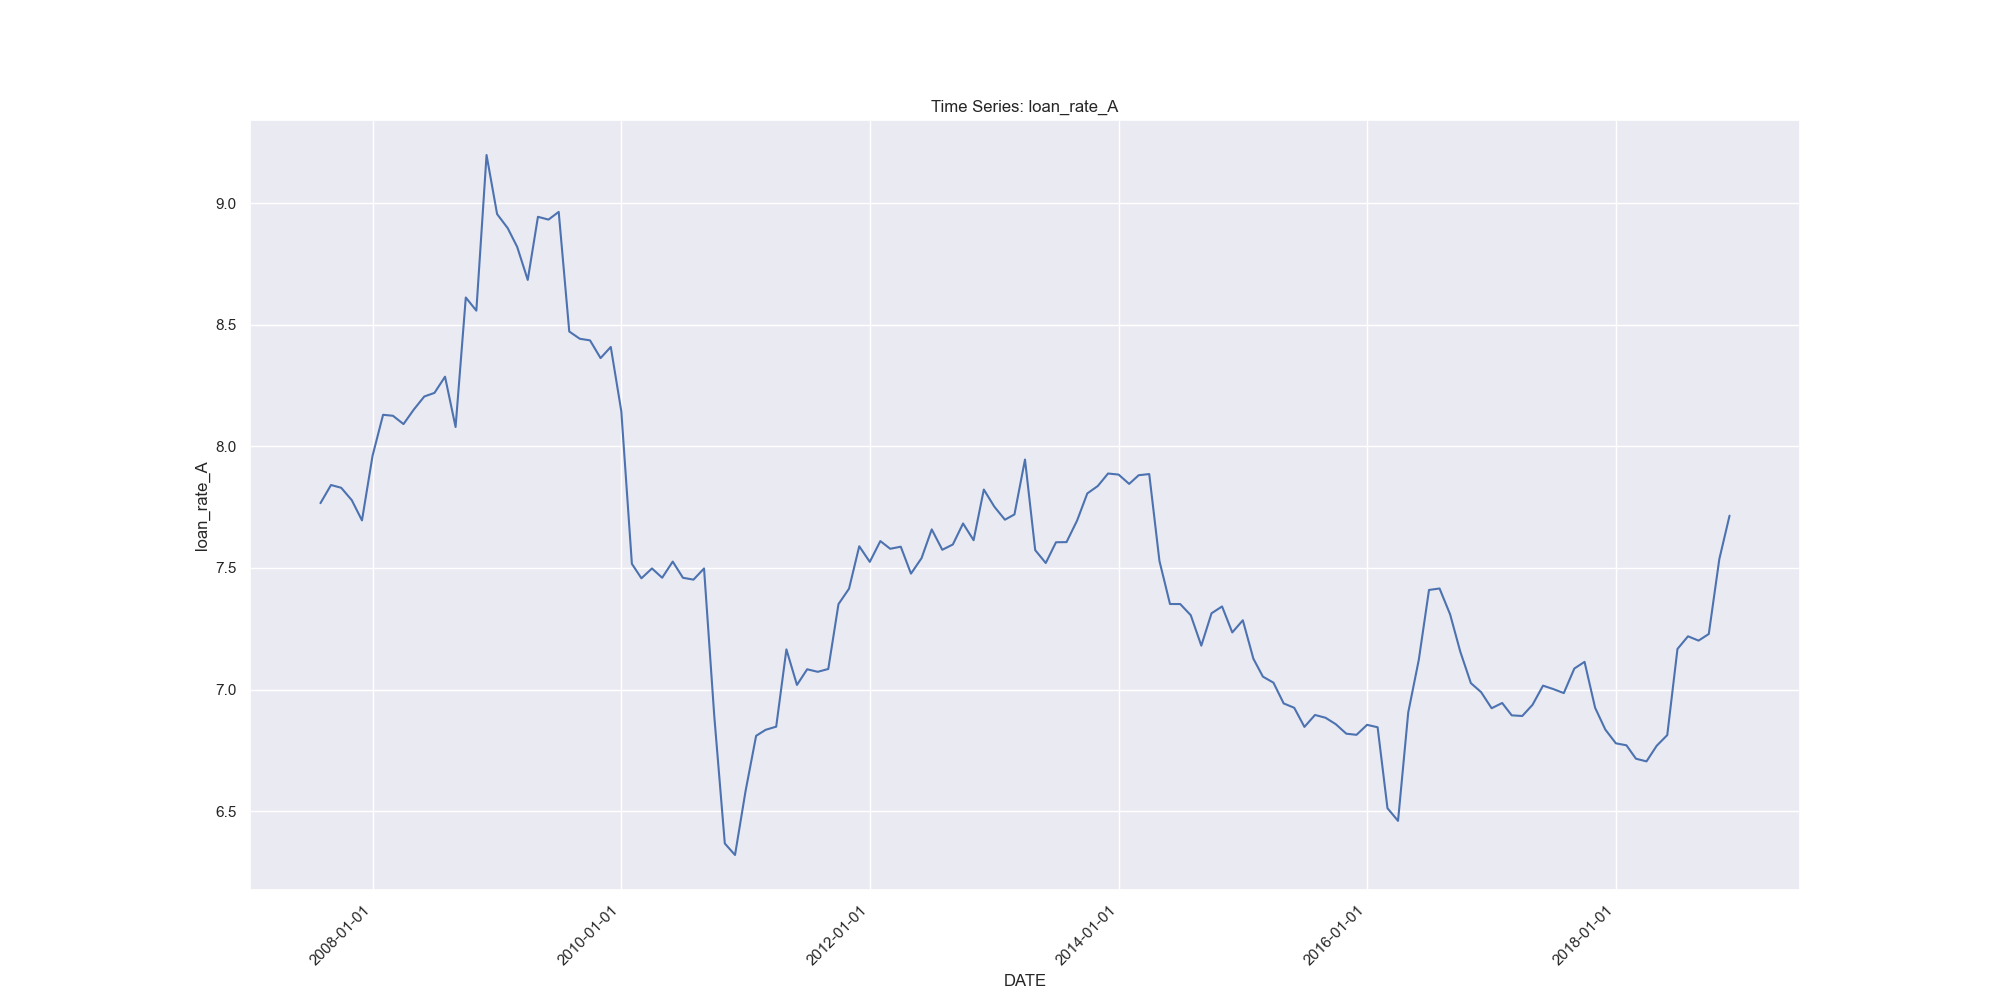
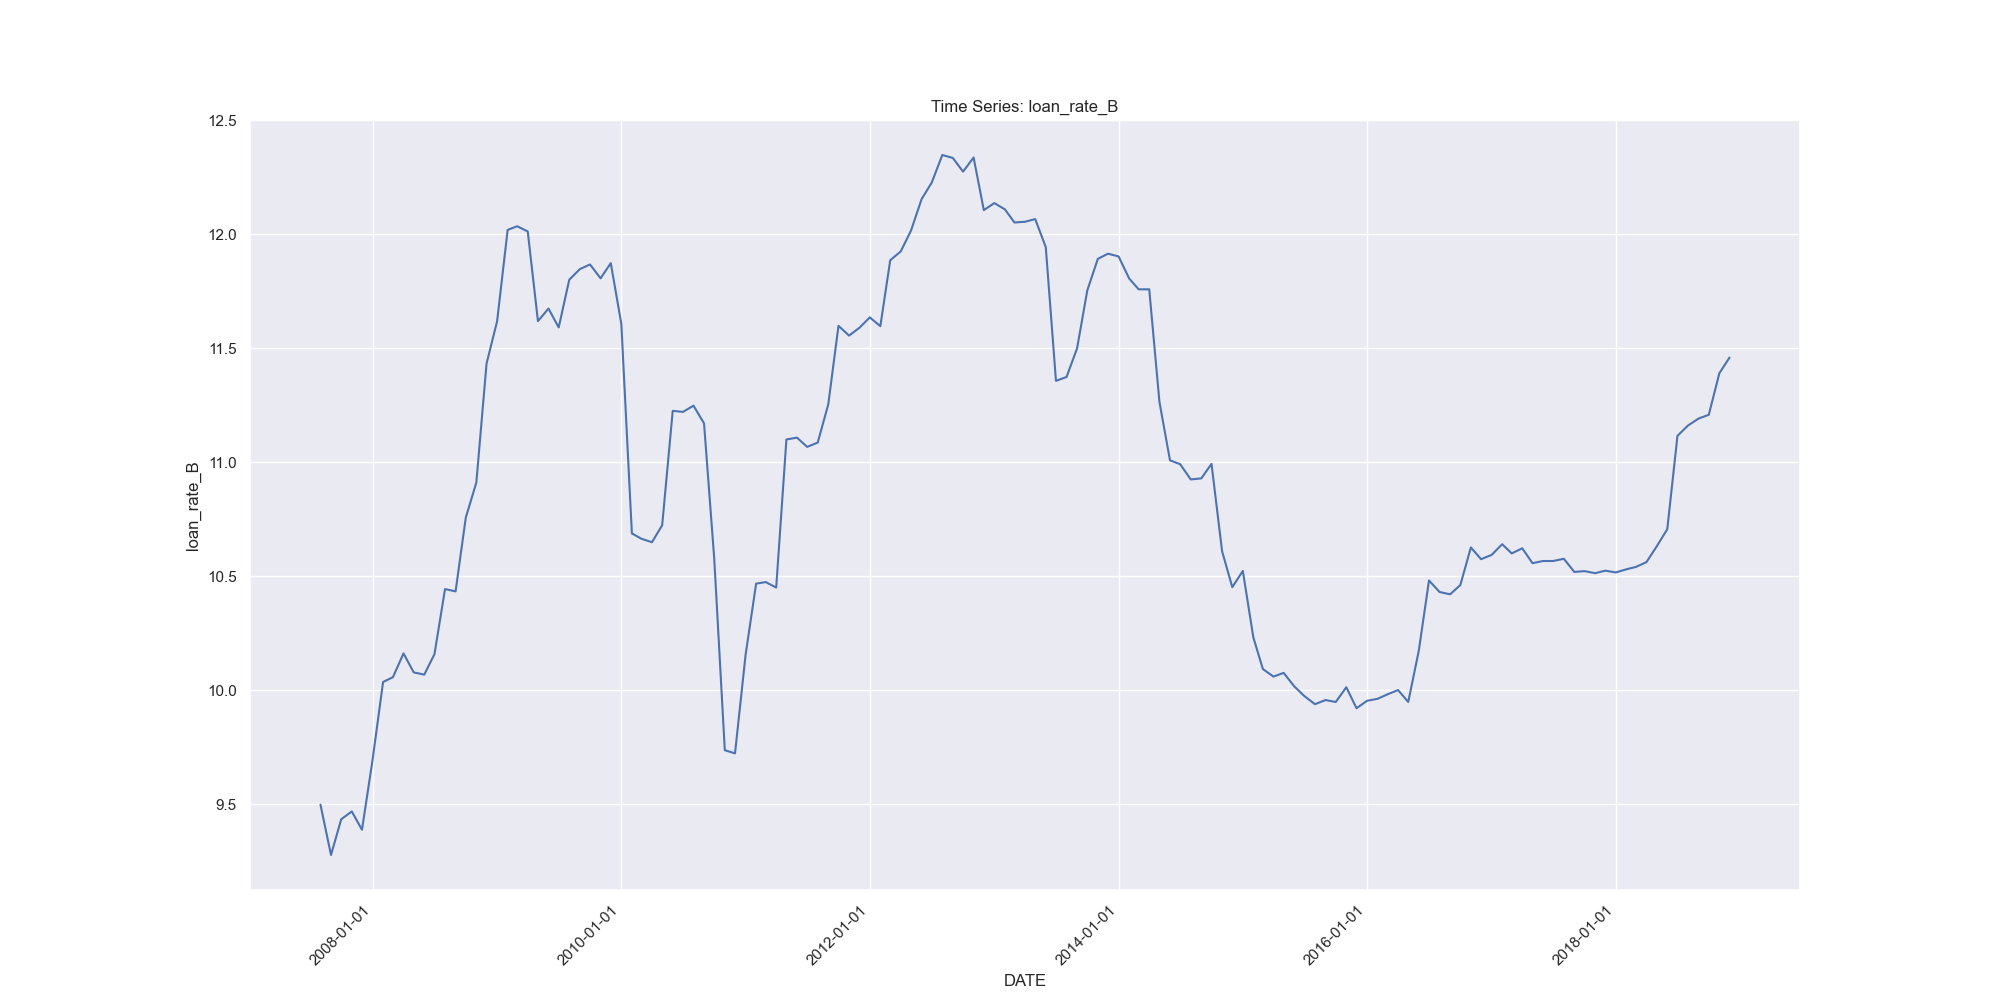
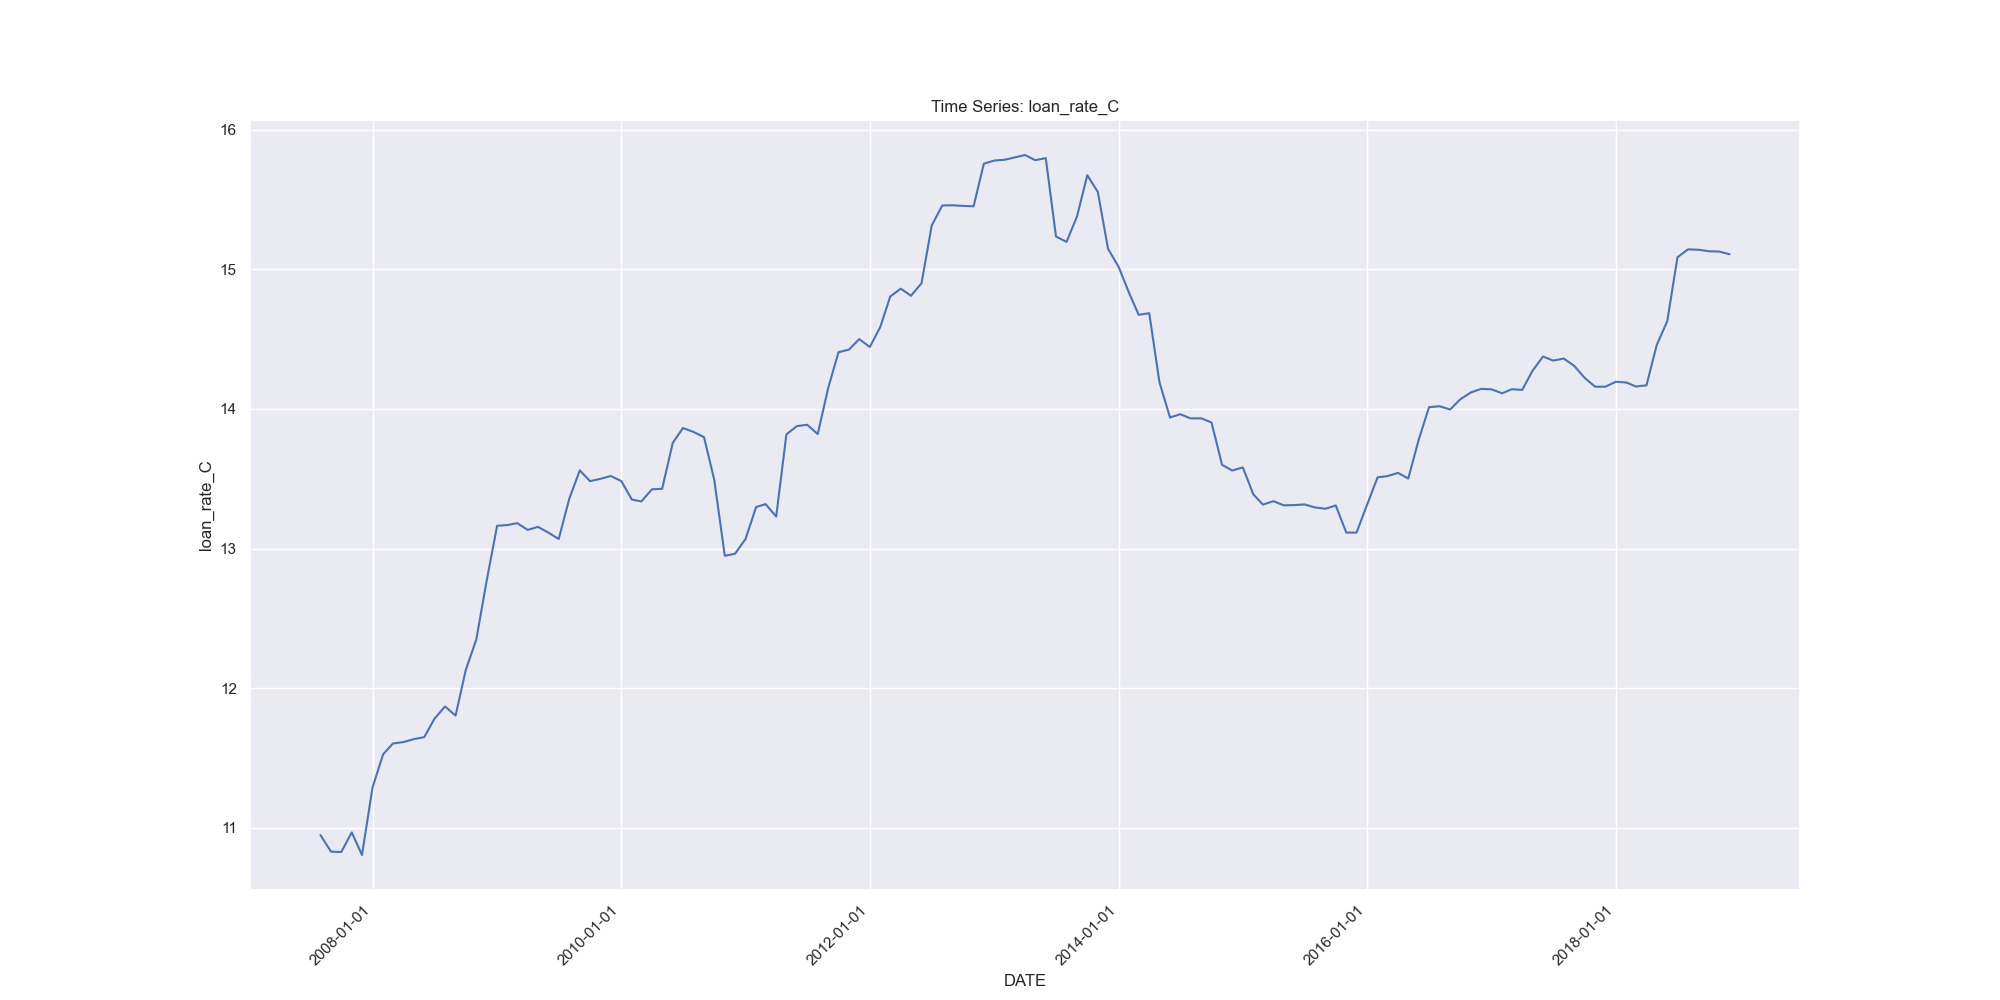
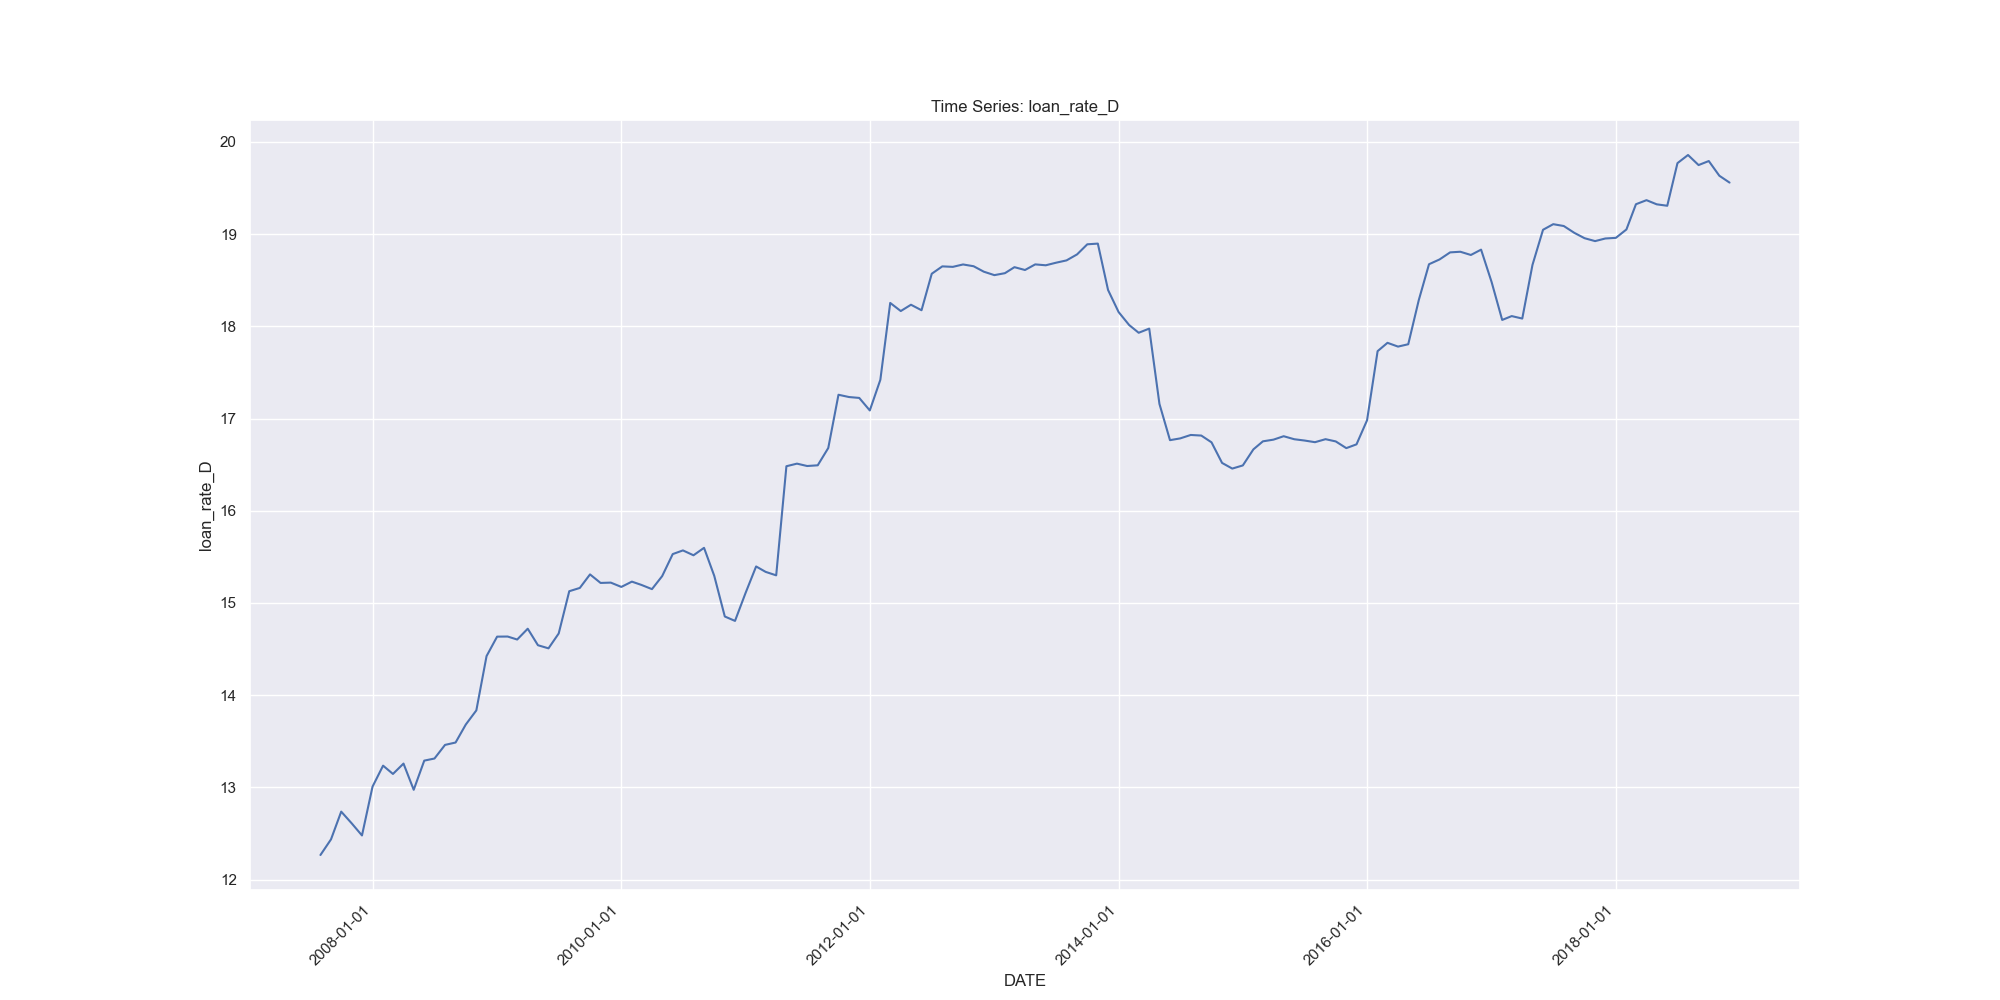
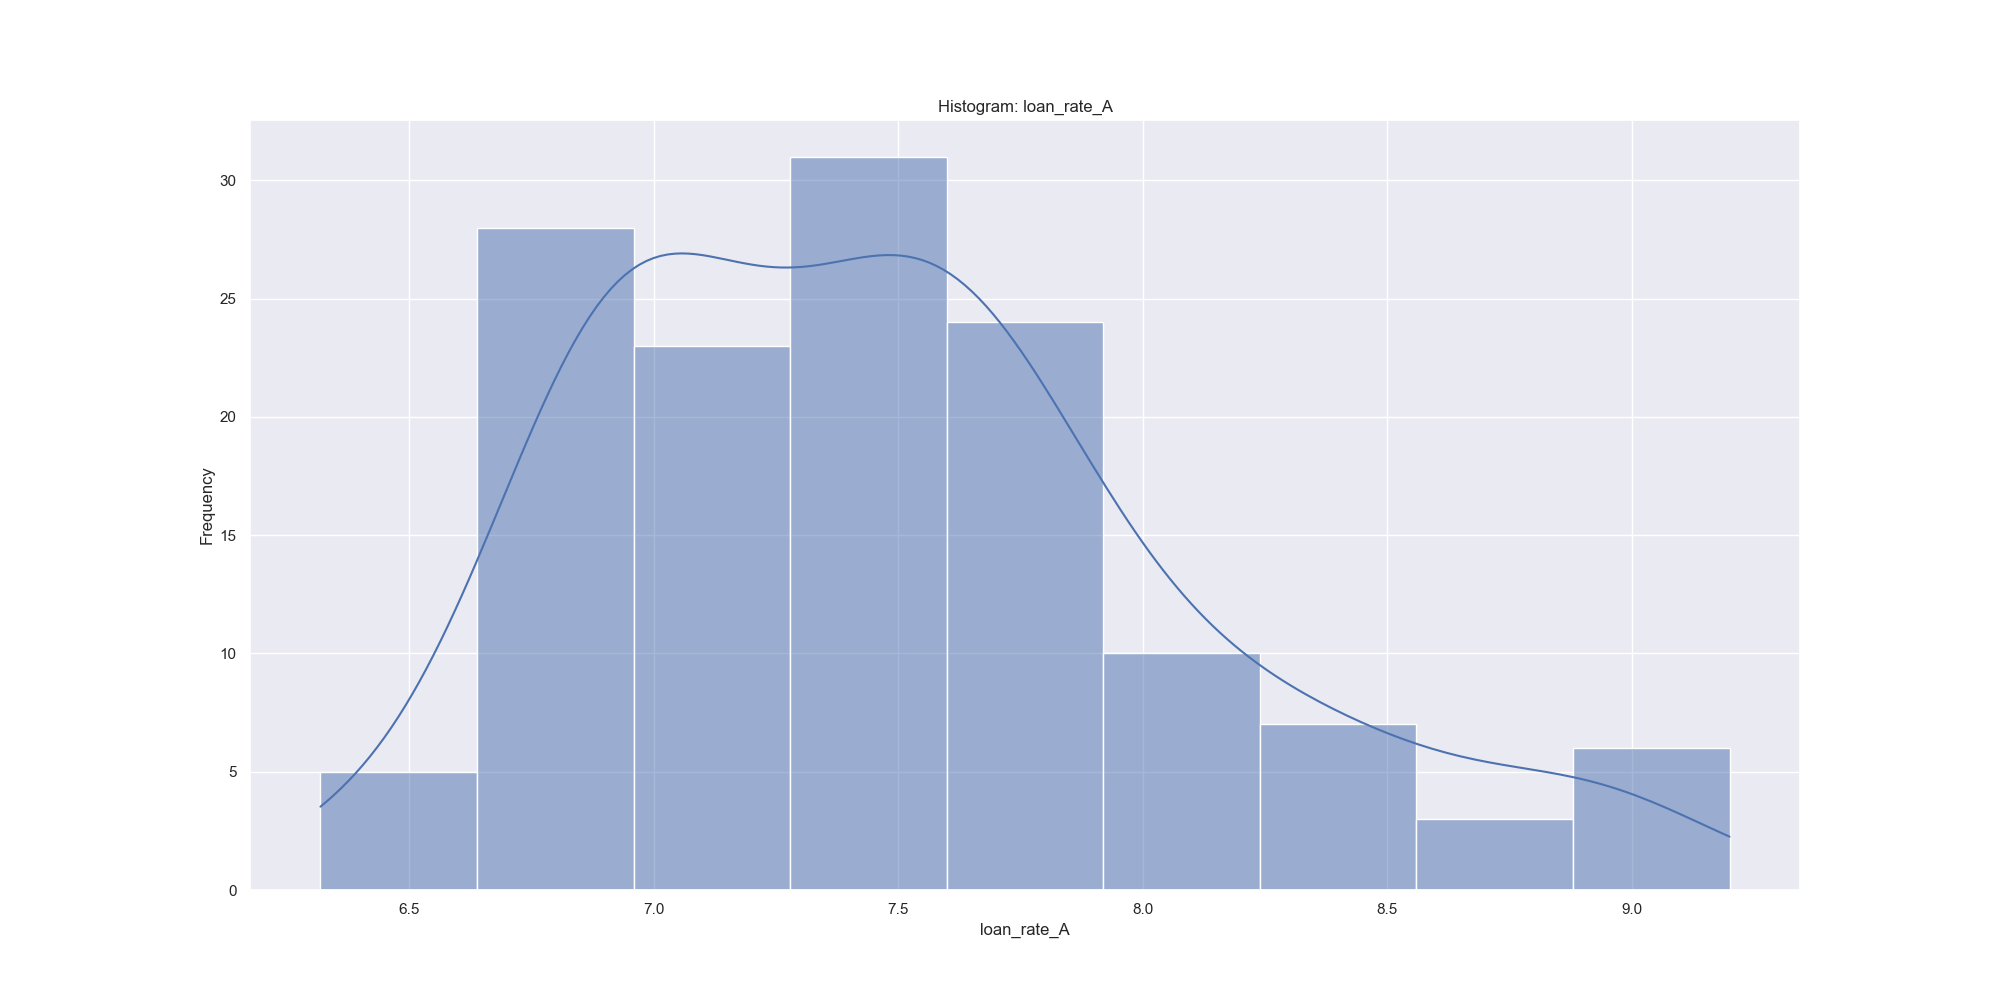
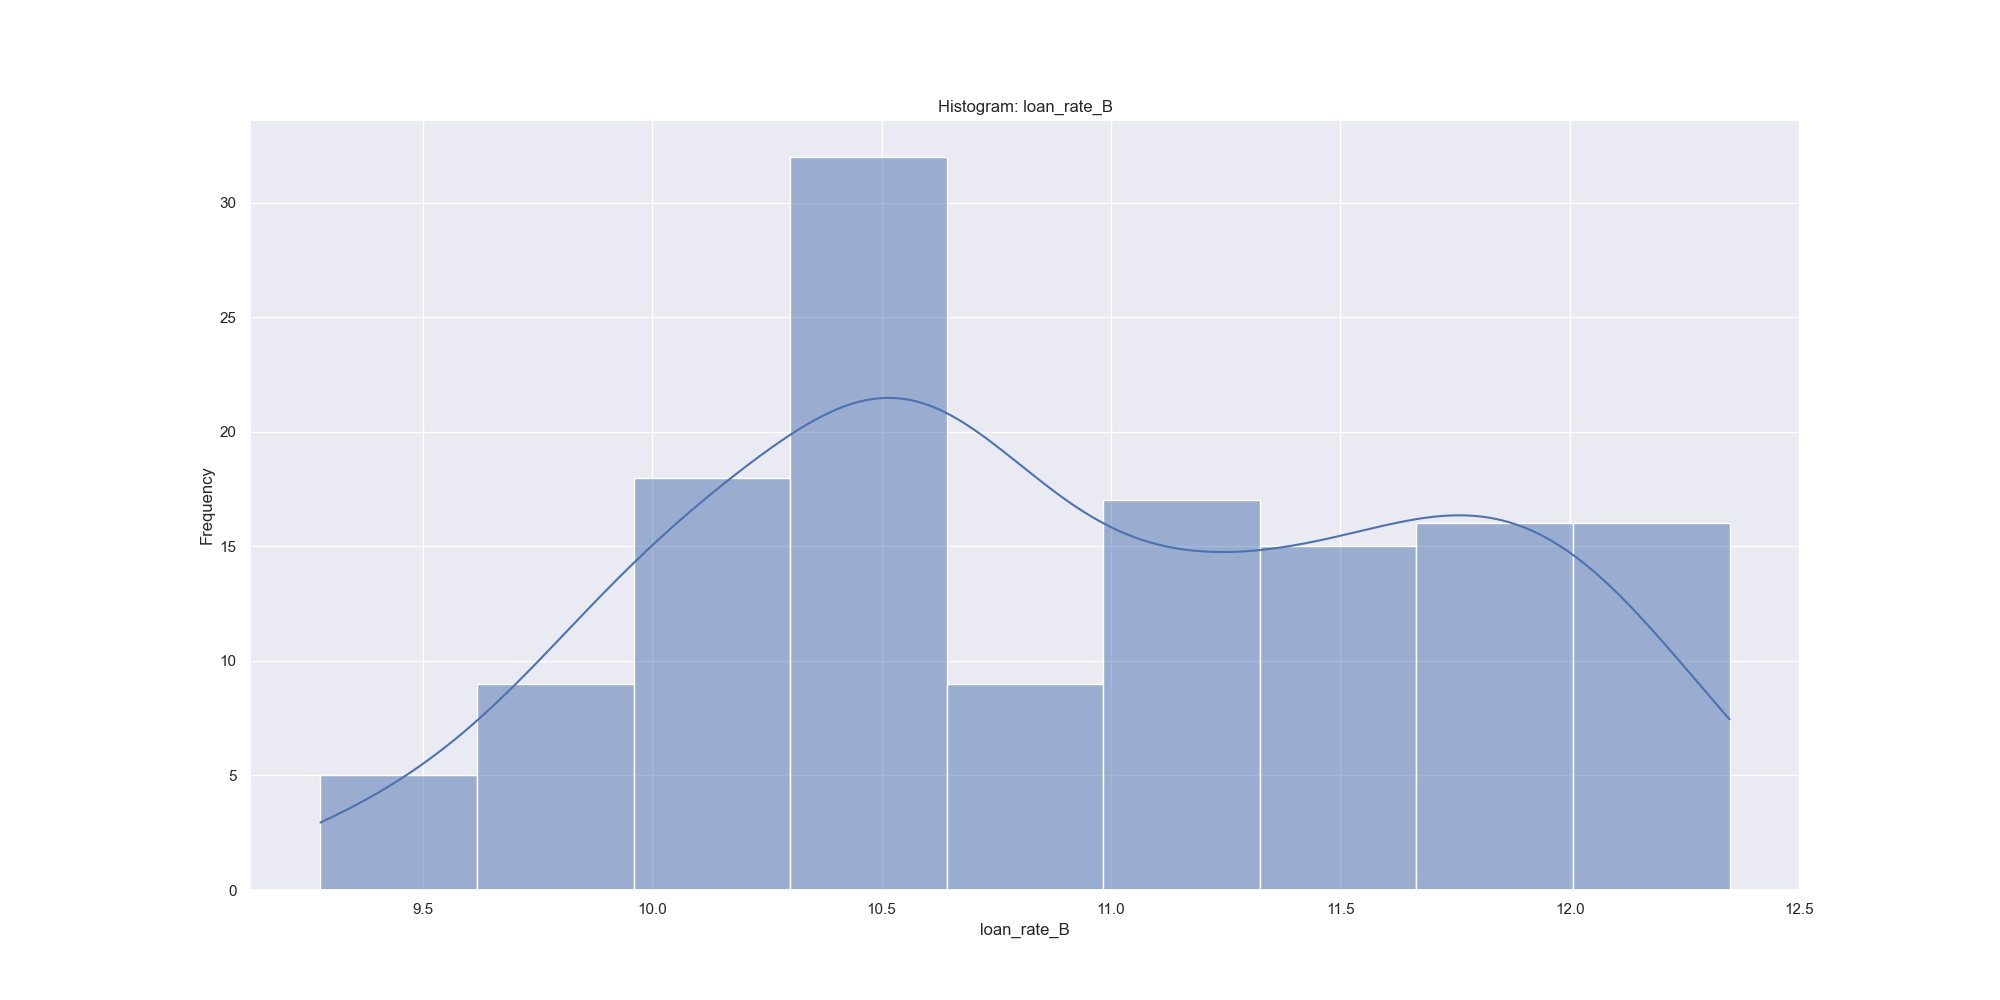
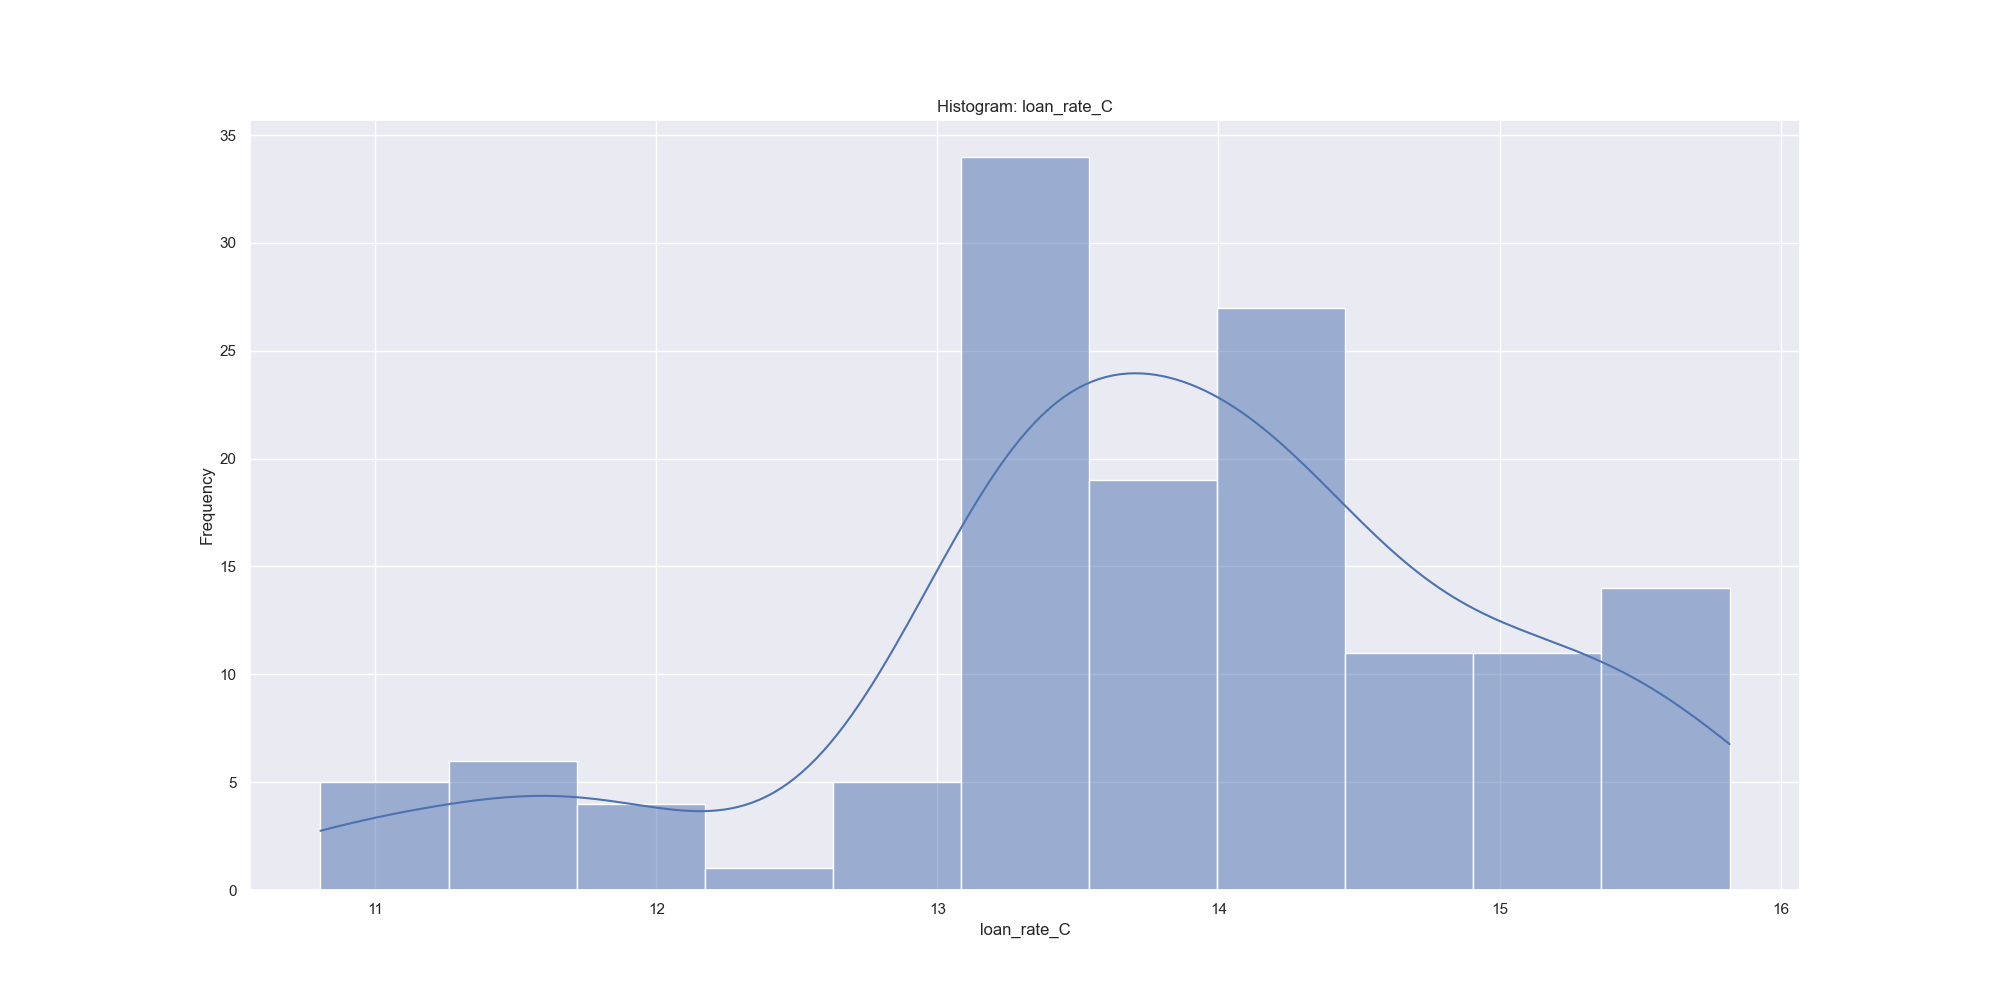
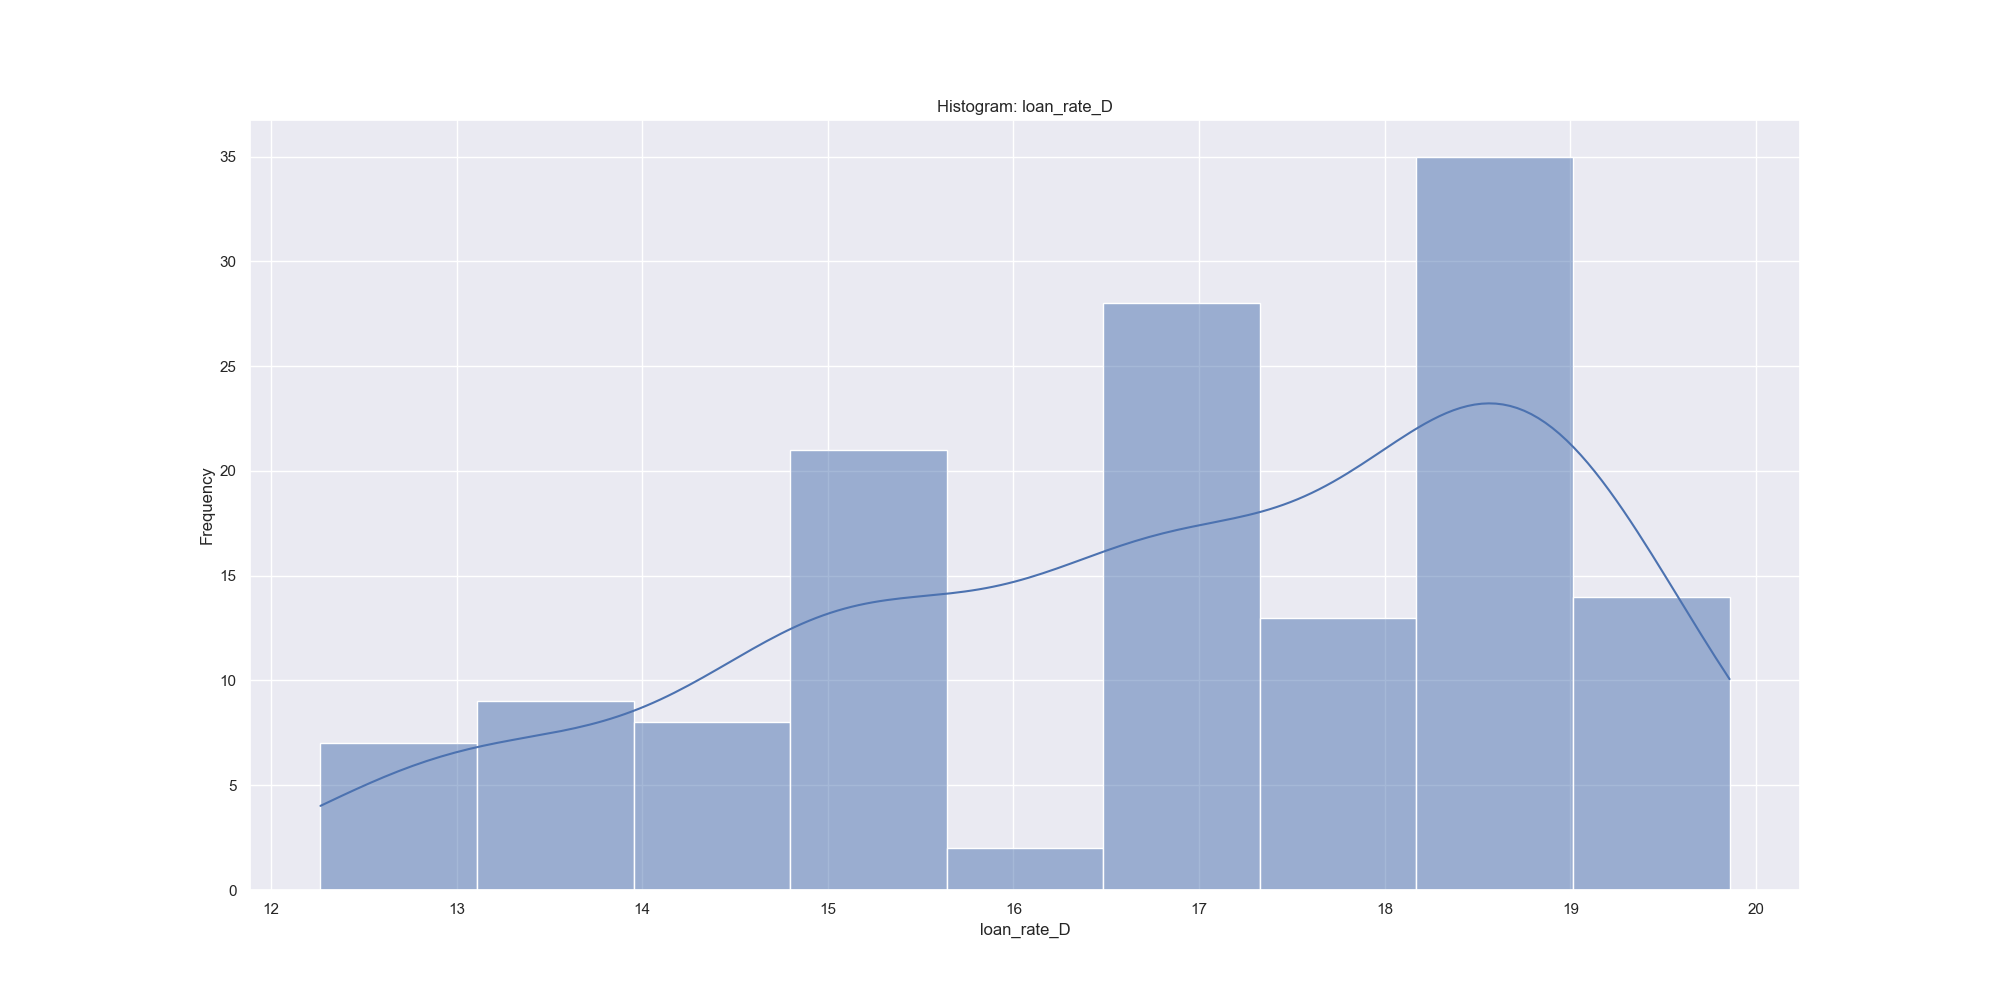
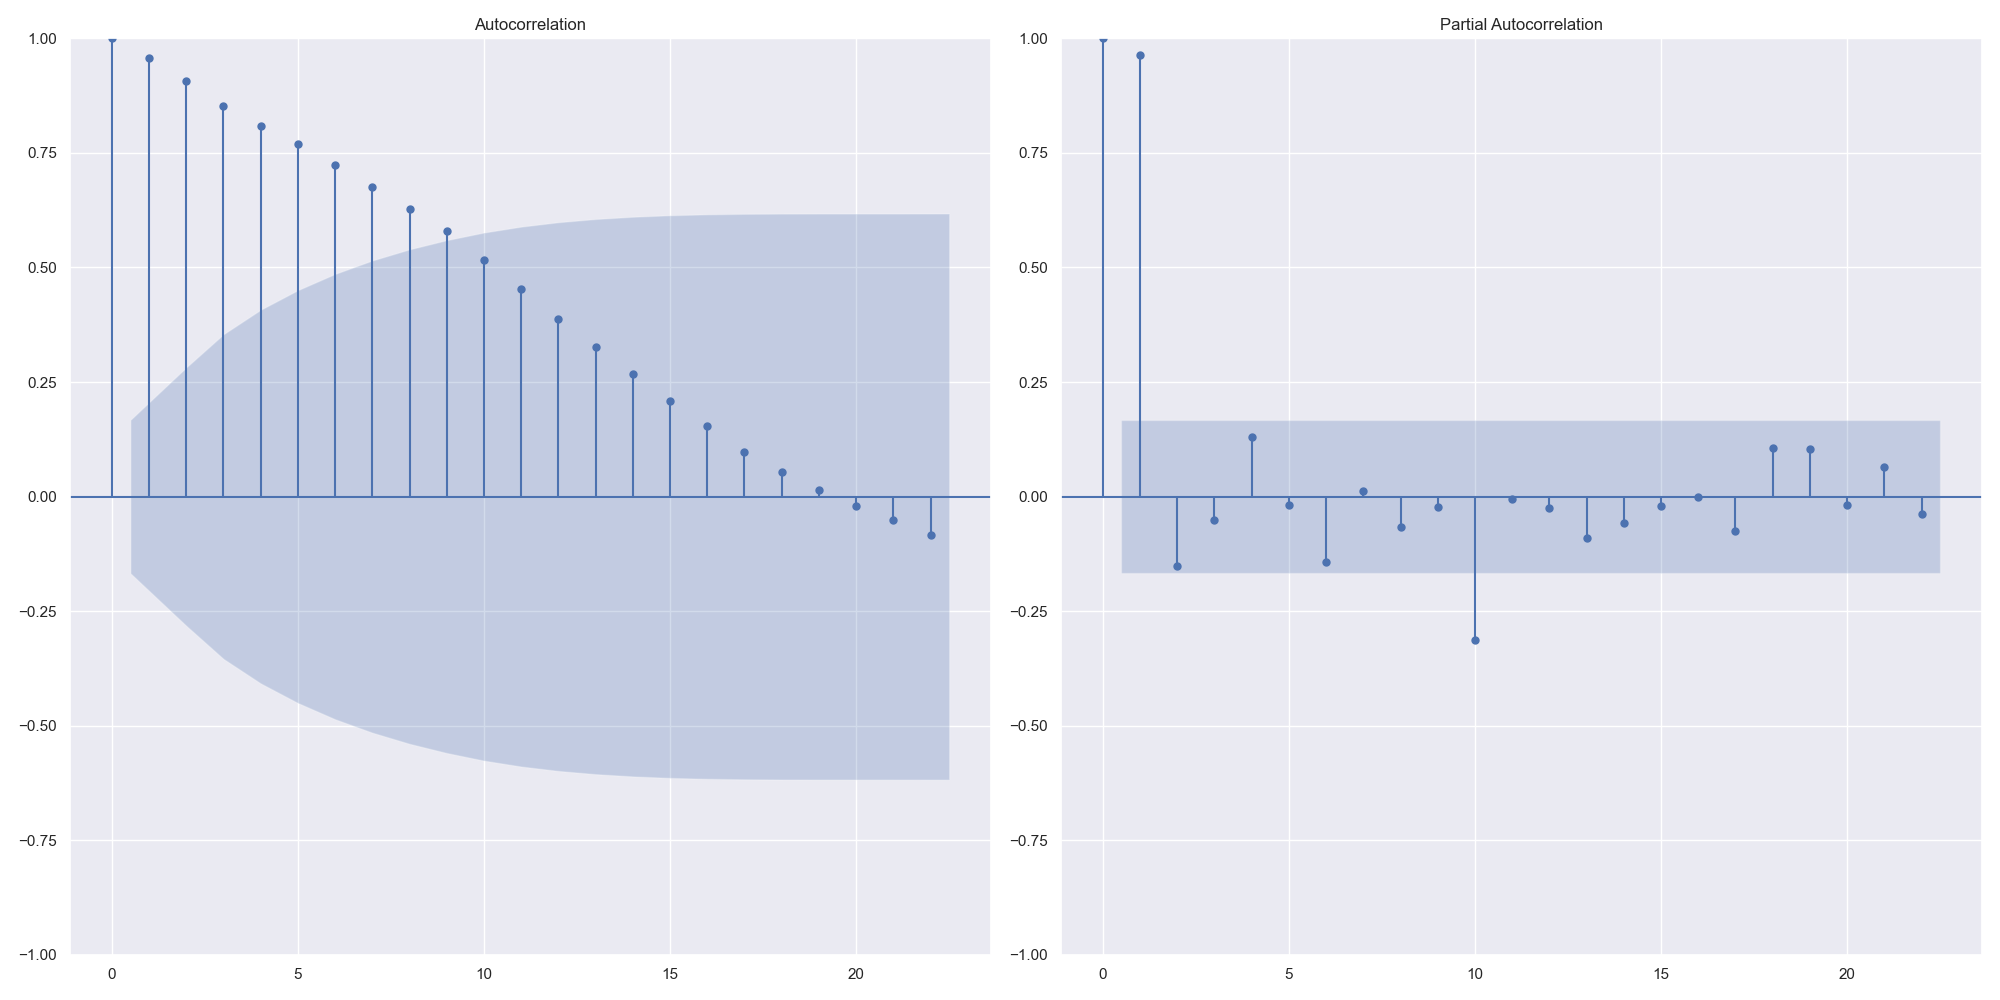
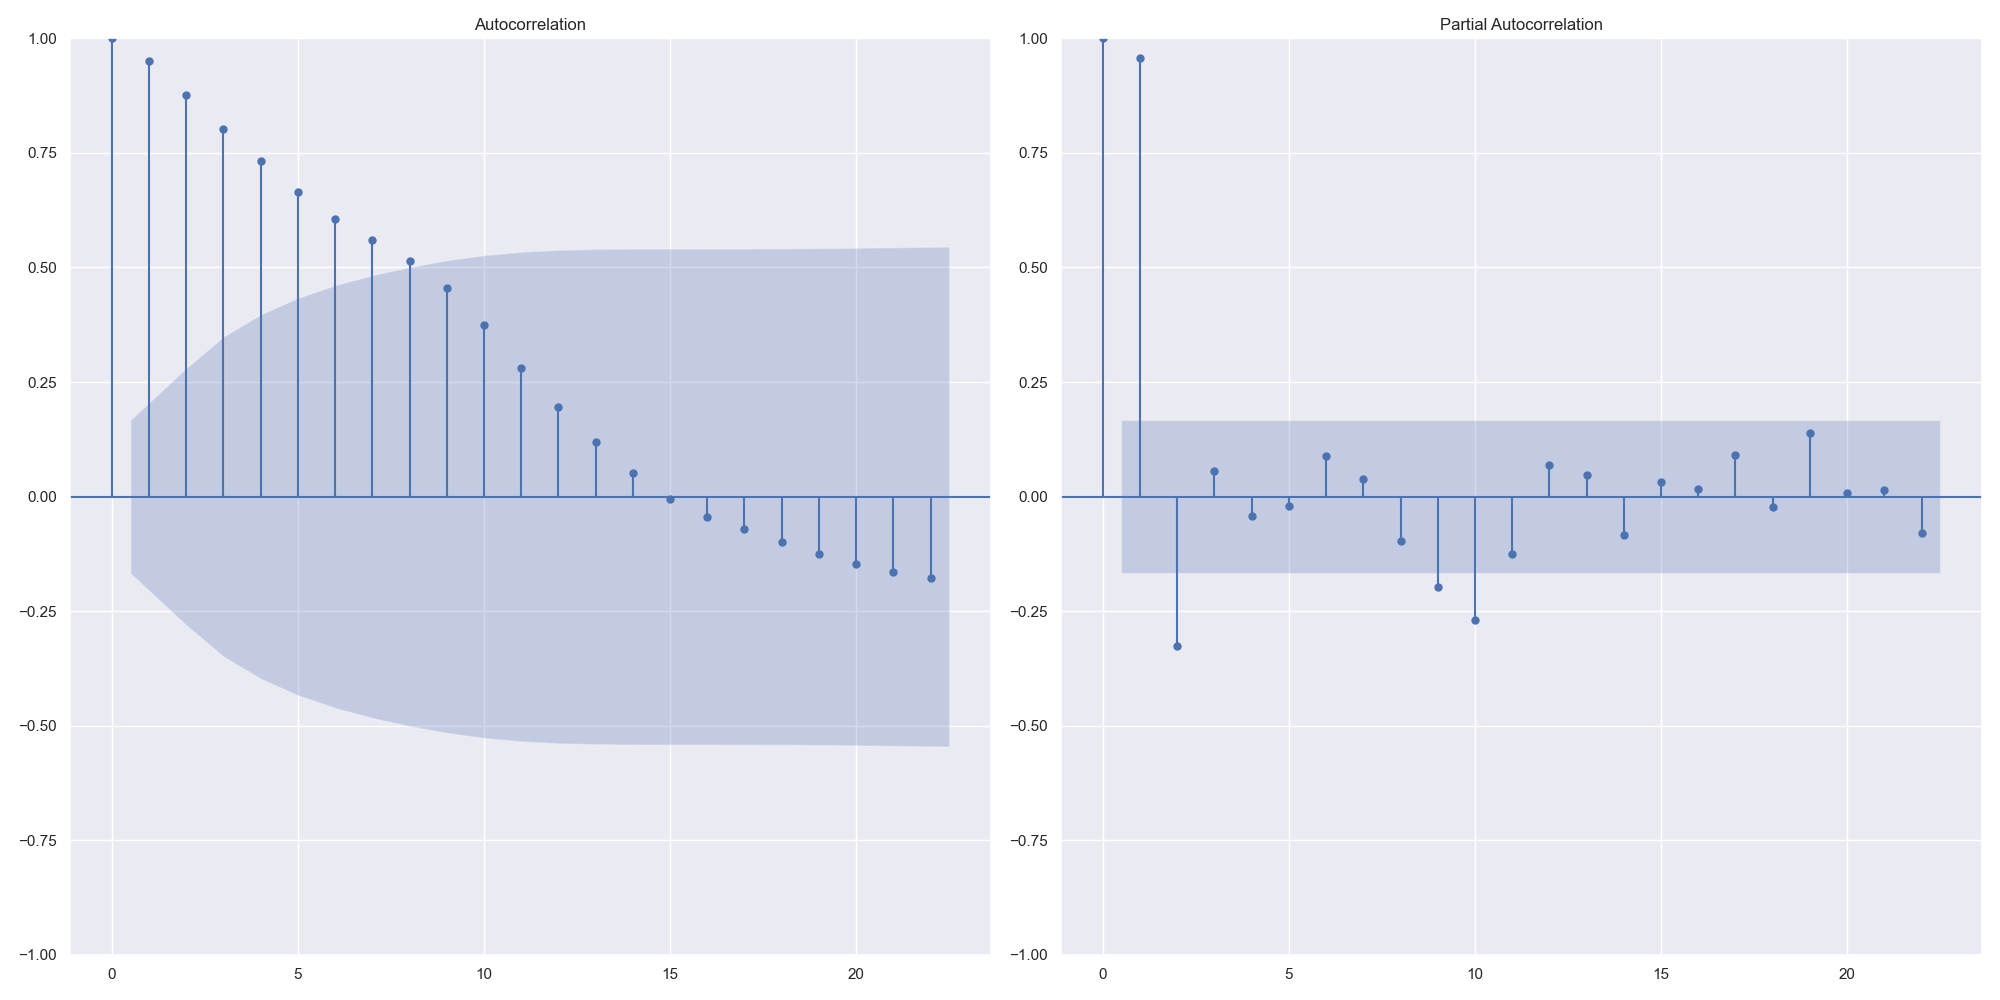
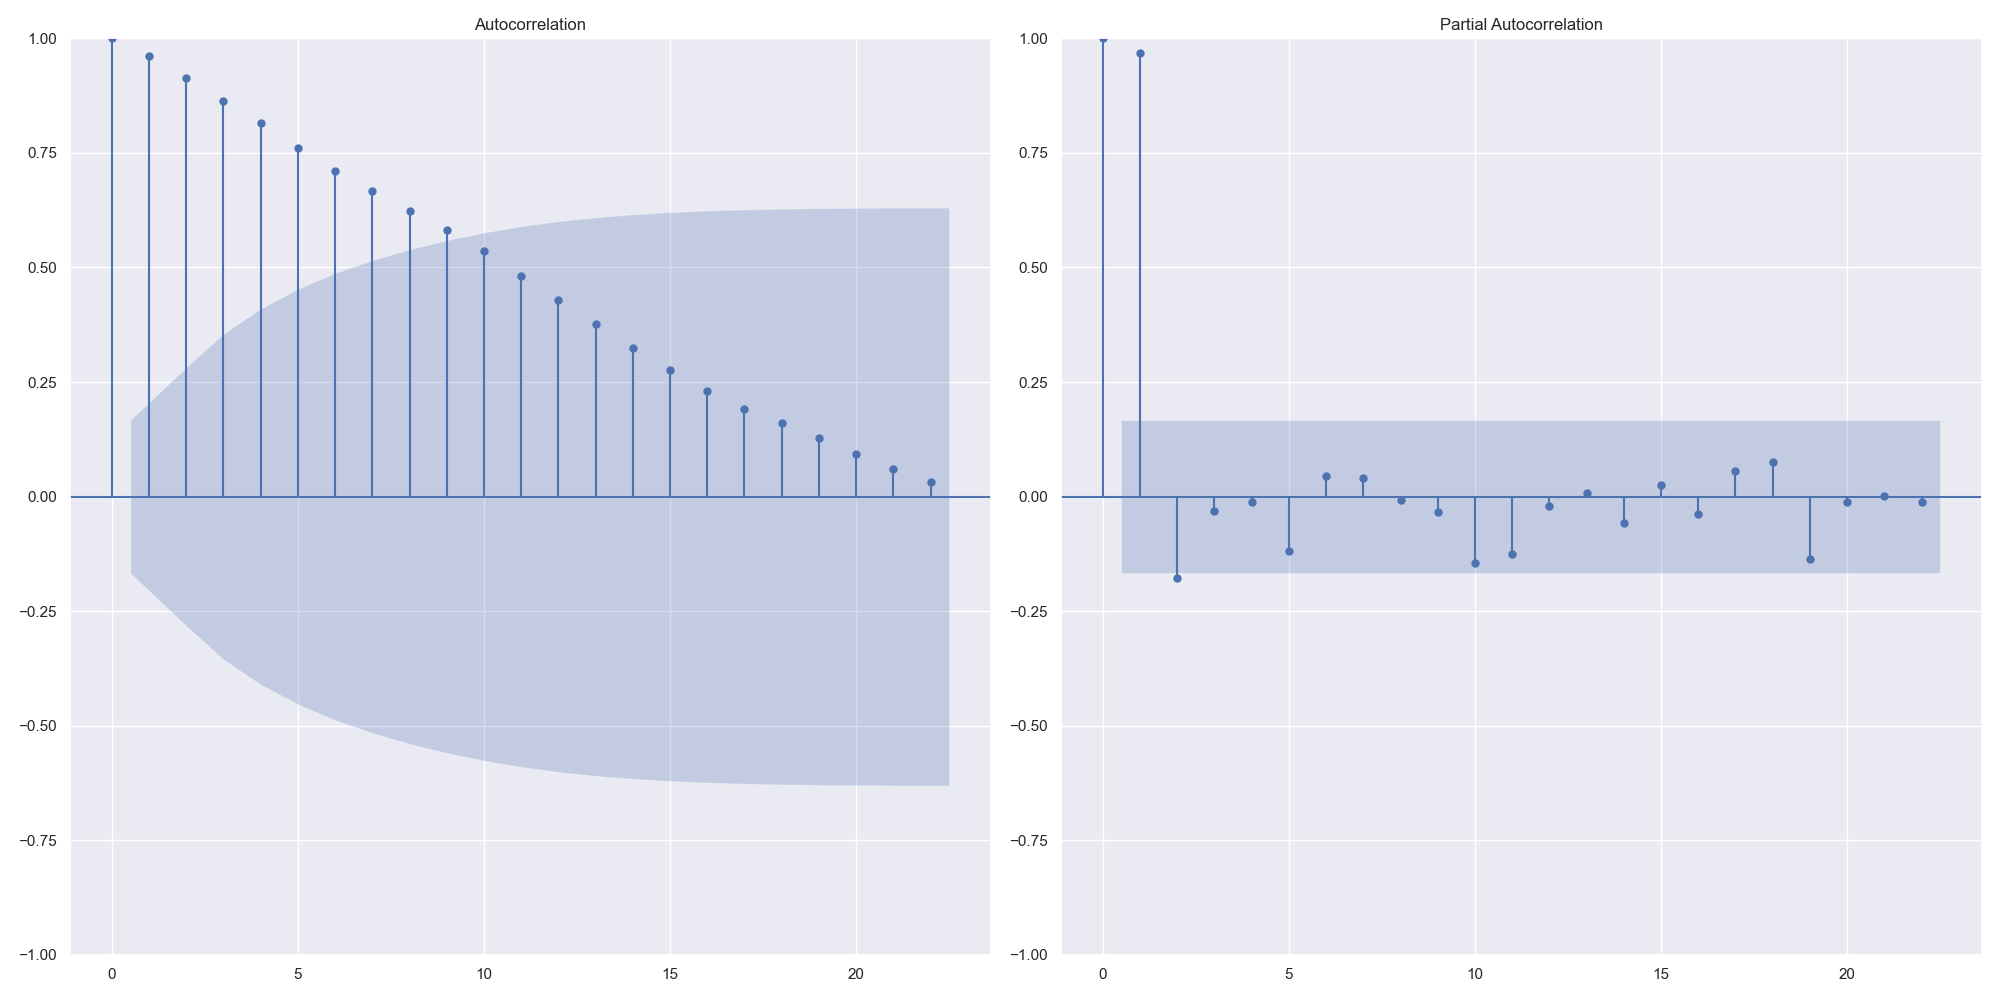
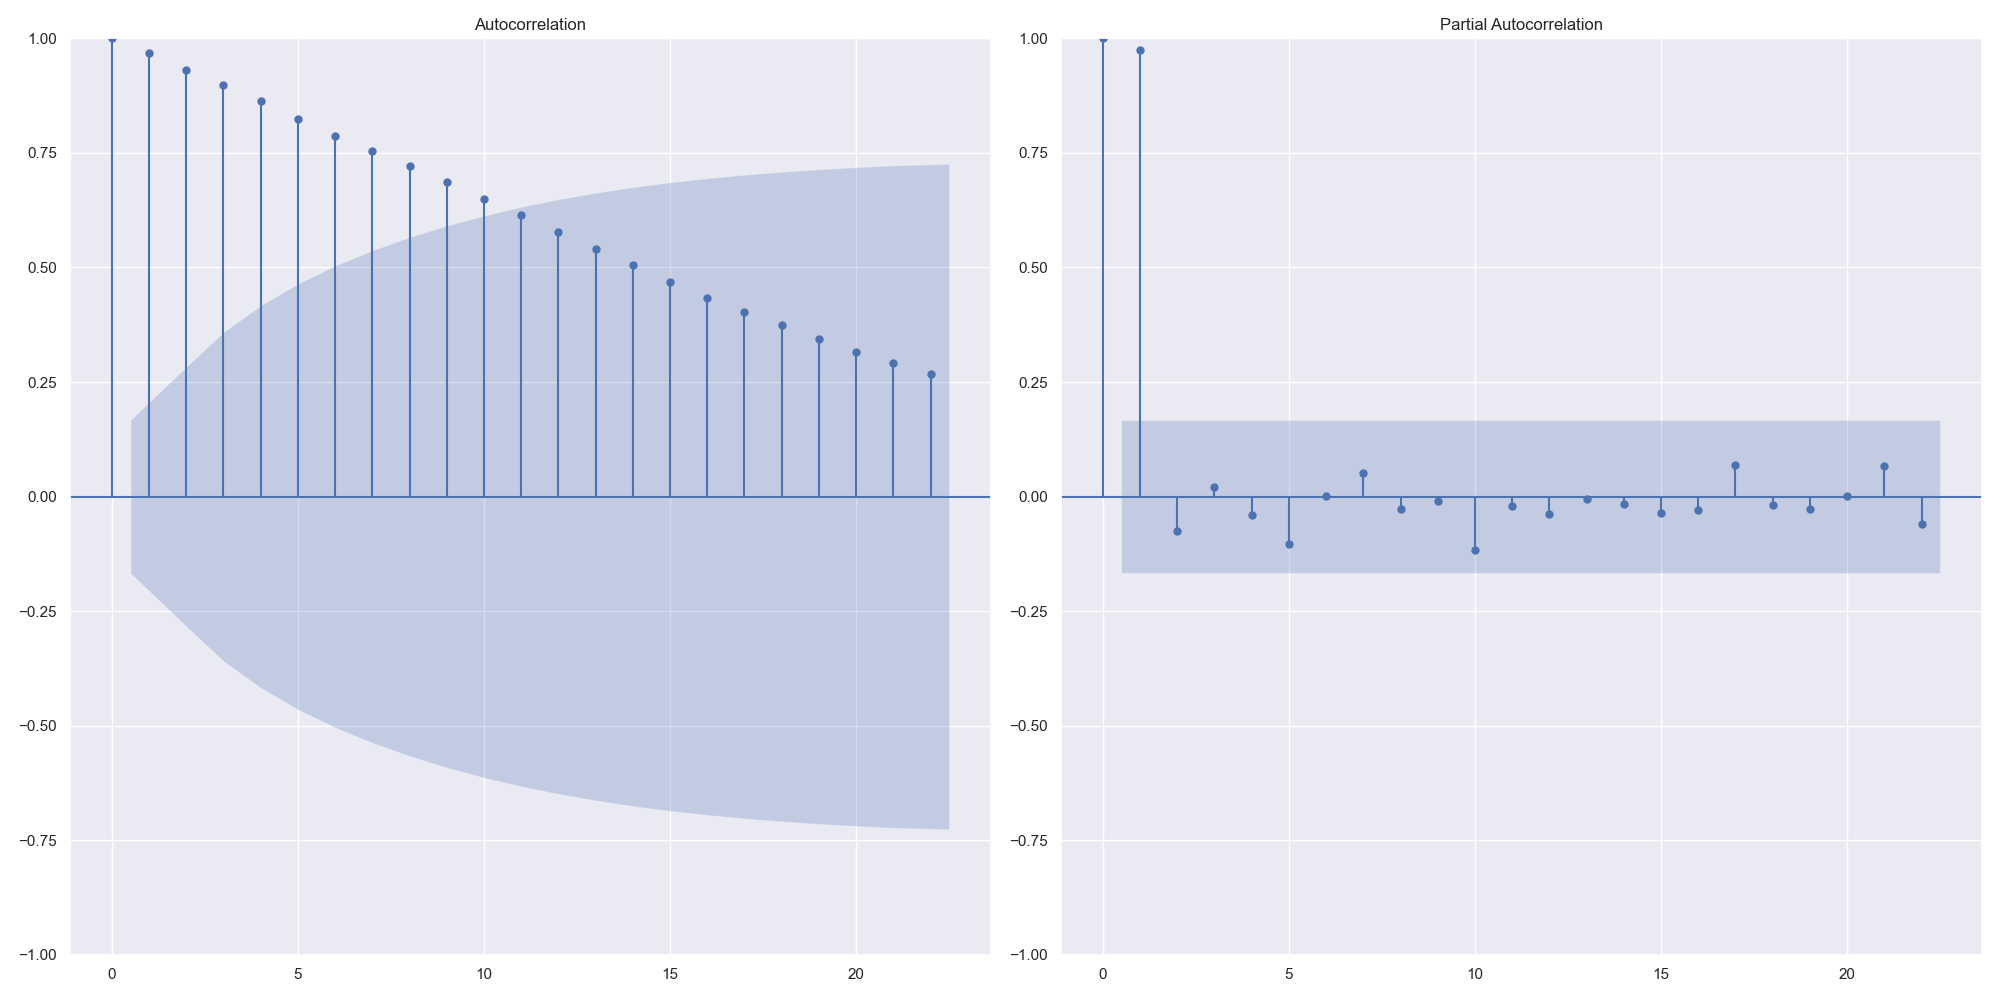
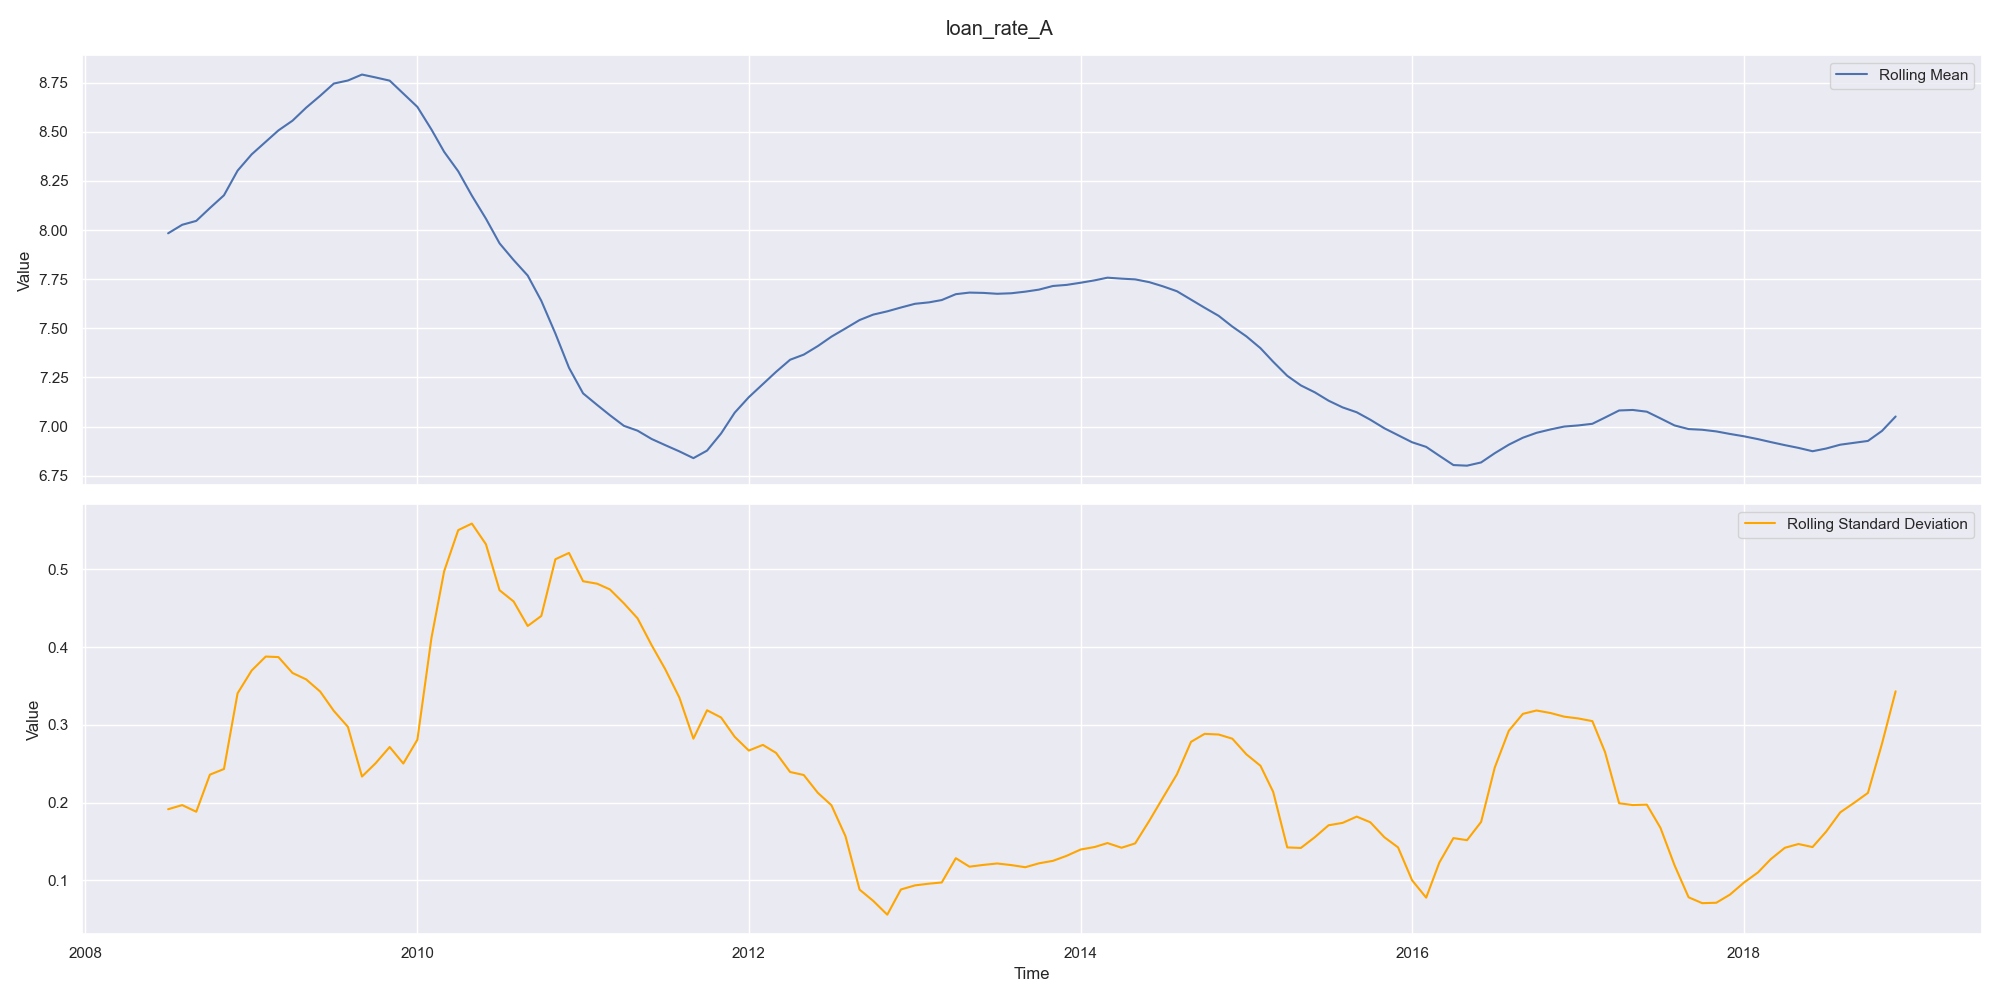
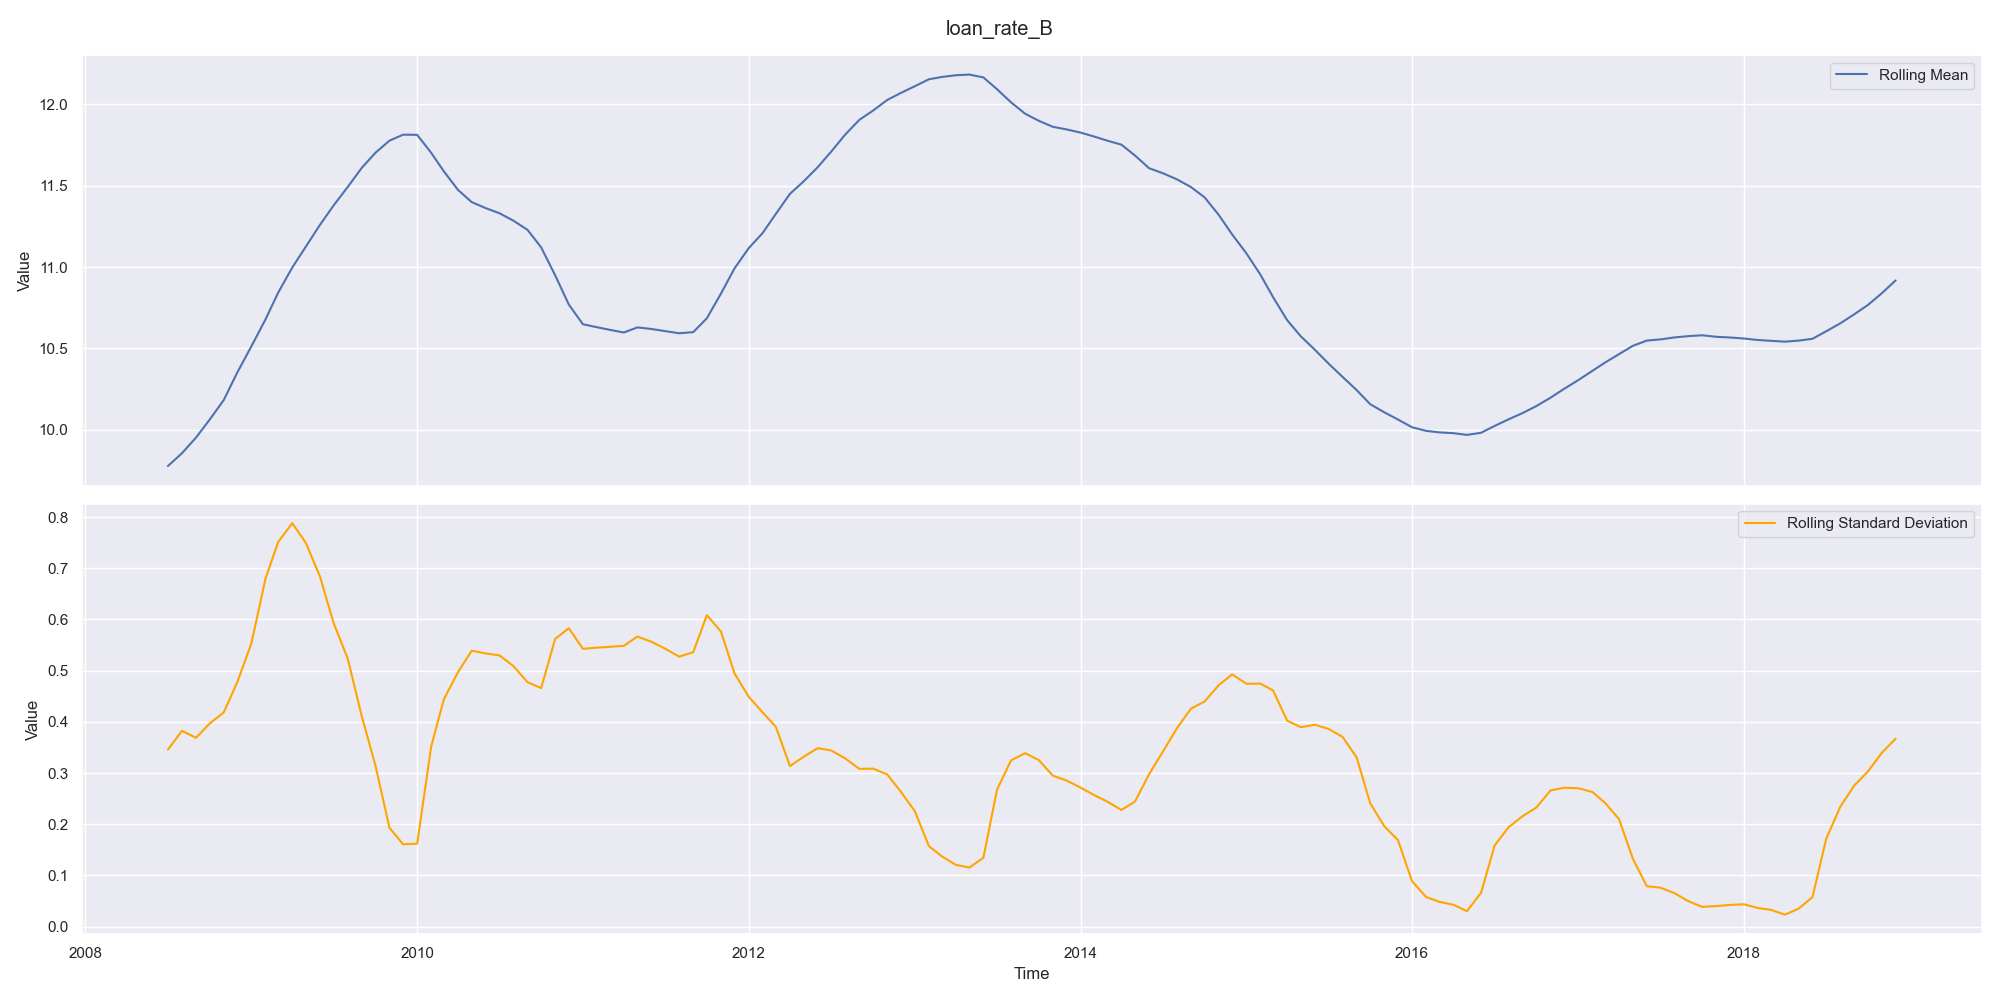
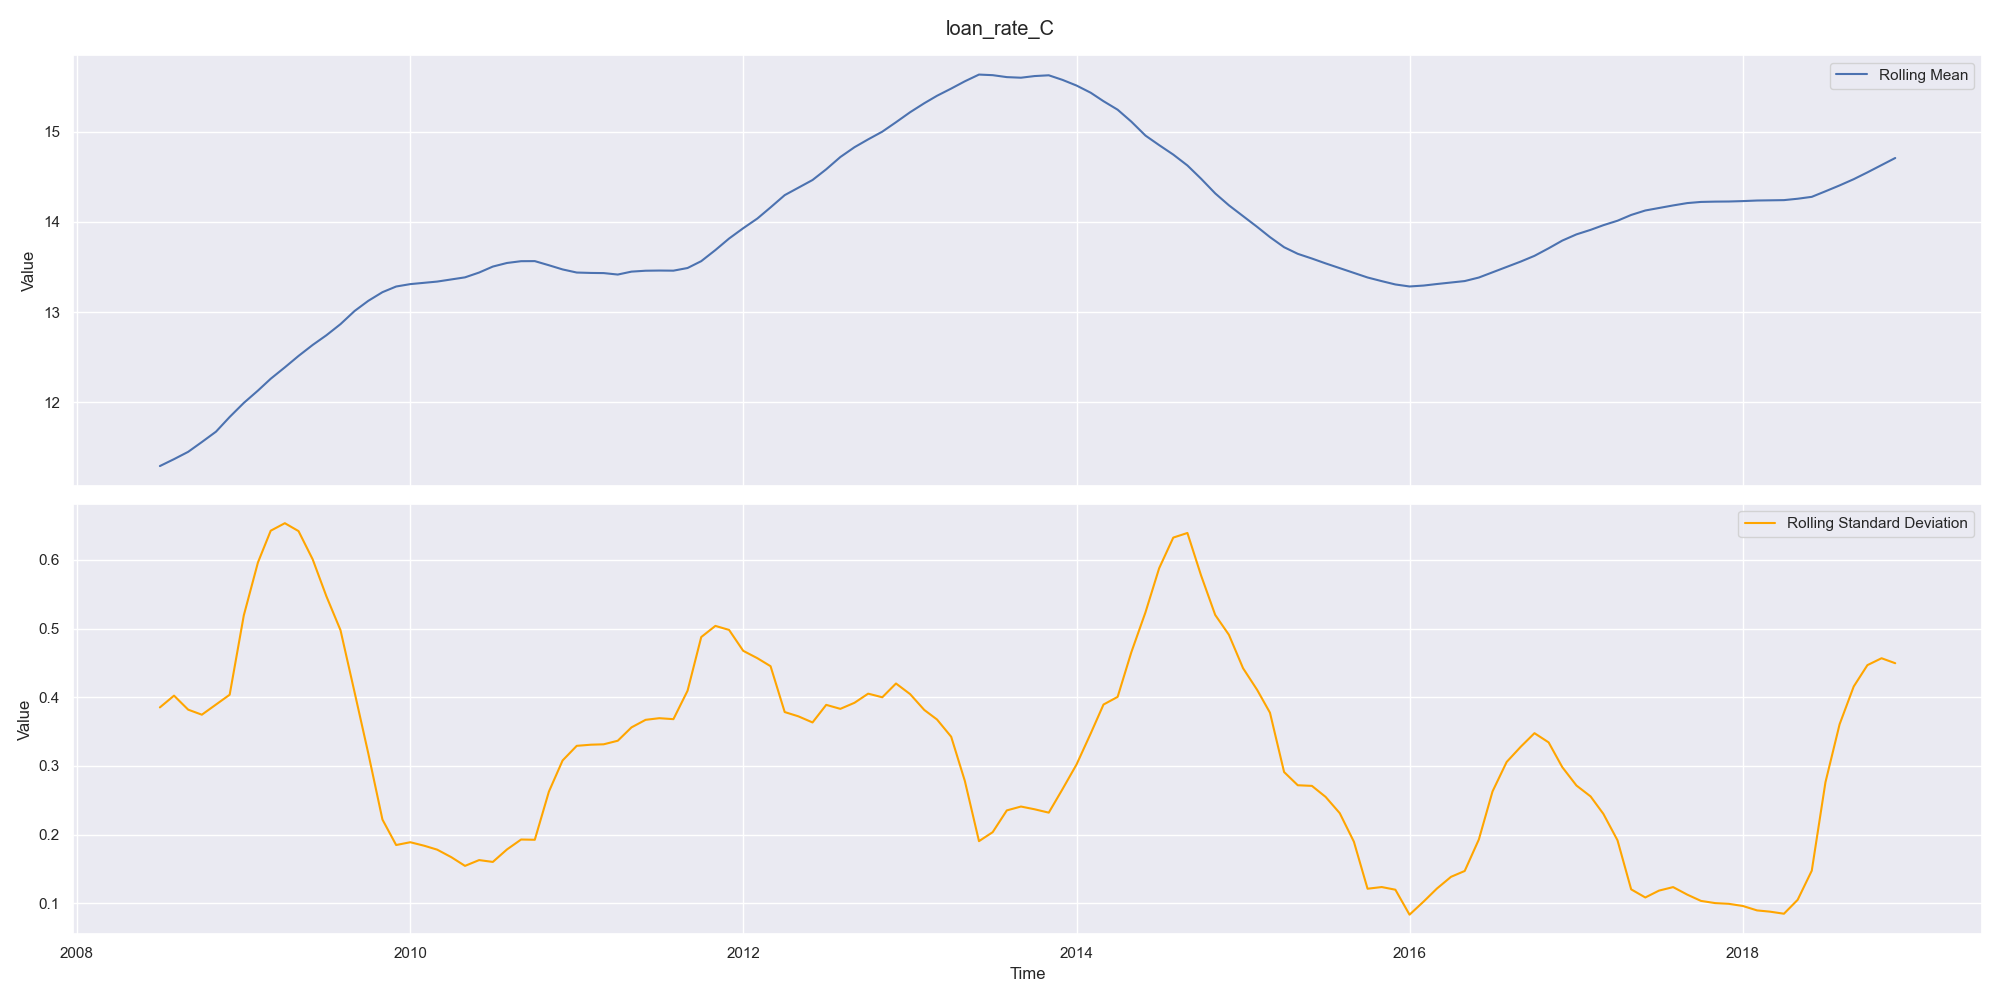
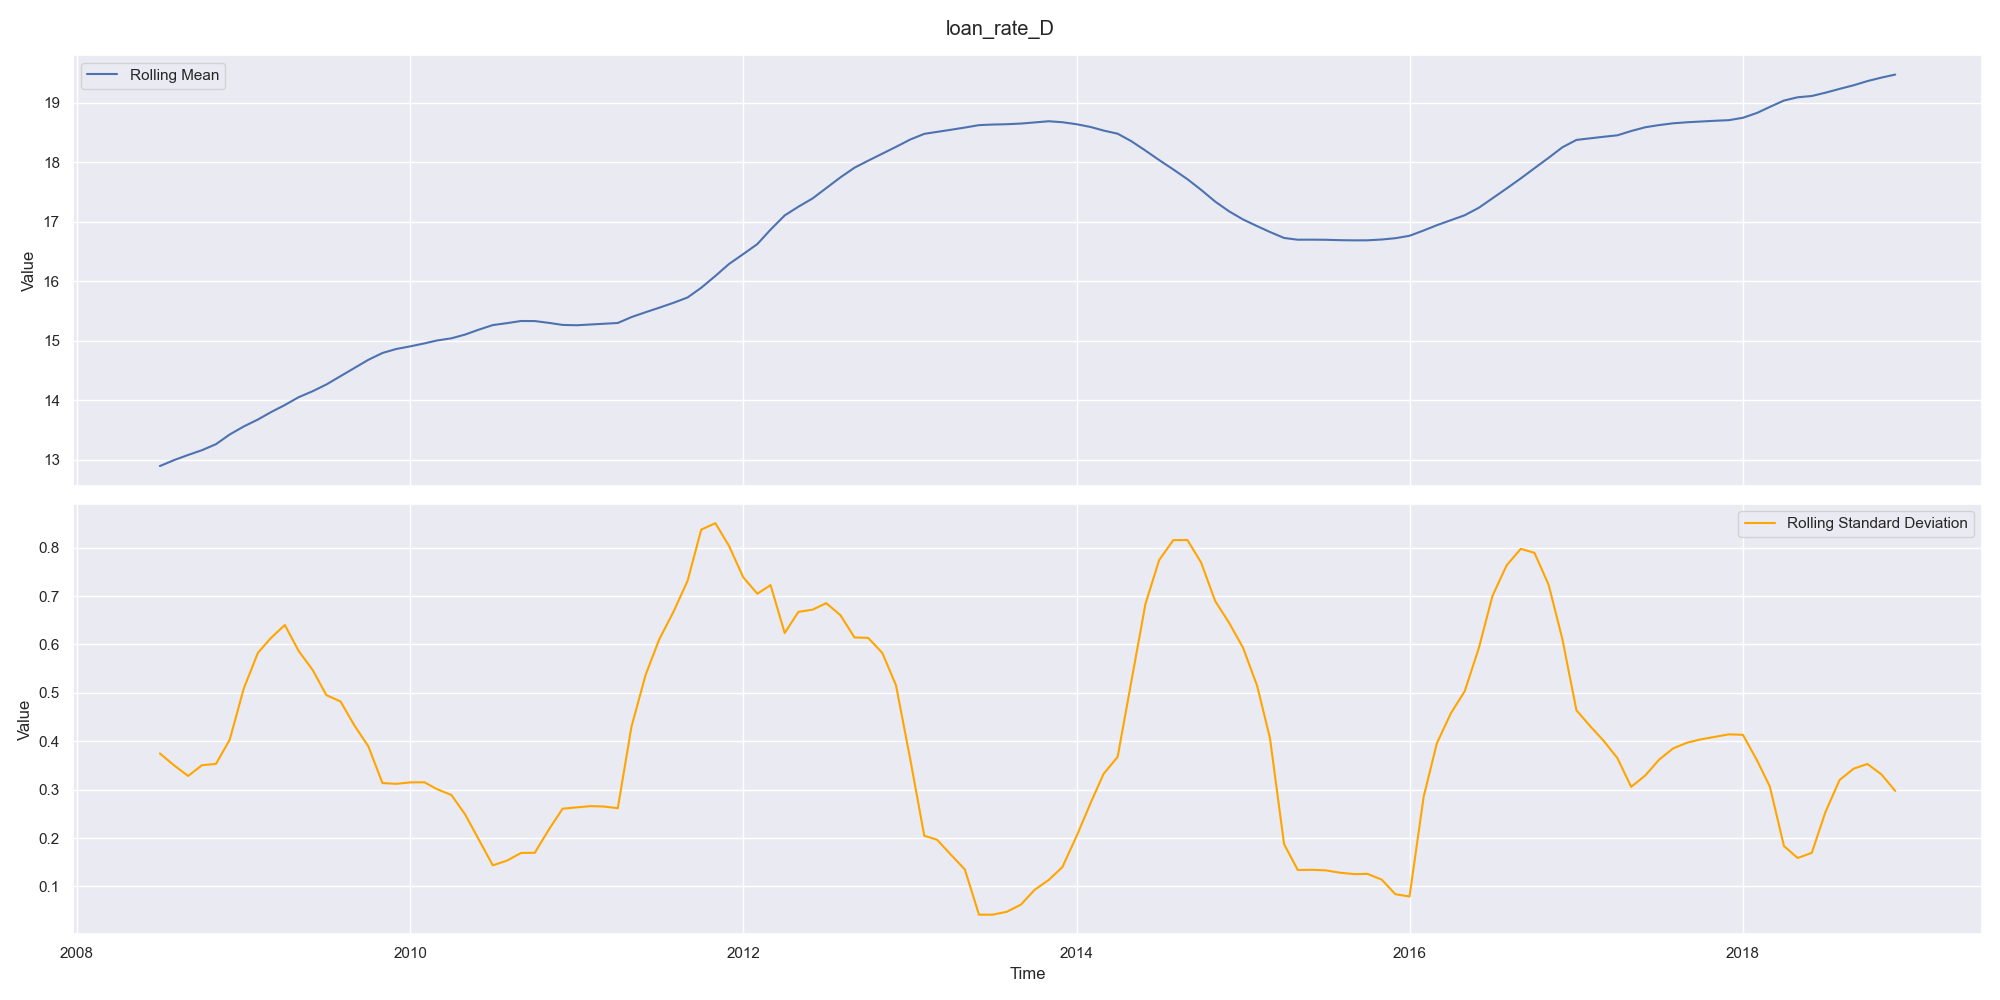

TimeSeriesUnivariate(test_context=TestContext(dataset=Dataset(raw_dataset=            loan_rate_A  loan_rate_B  loan_rate_C  loan_rate_D
DATE                                                          
2007-08-01     7.766667     9.497692    10.947500    12.267000
2007-09-01     7.841429     9.276667    10.829167    12.436667
2007-10-01     7.830000     9.433333    10.825926    12.737368
2007-11-01     7.779091     9.467778    10.967037    12.609444
2007-12-01     7.695833     9.387500    10.805000    12.478889
...                 ...          ...          ...          ...
2018-08-01     7.218997    11.161286    15.142618    19.857603
2018-09-01     7.201281    11.191918    15.139769    19.748459
2018-10-01     7.228498    11.208418    15.129105    19.792163
2018-11-01     7.536897    11.390483    15.126869    19.632697
2018-12-01     7.715209    11.459631    15.107476    19.558346

[137 rows x 4 columns], fields=[{'id': 'loan_rate_A', 'type': 'Numeric'}, {'id': 'loan_rate_B', 'type': 'N

In [20]:
test_plan_config = {
    "time_series_line_plot": {
        "columns": target_column + feature_columns
    },
    "time_series_histogram": {
        "columns": target_column + feature_columns
    },
    "acf_pacf_plot": {
        "columns": target_column + feature_columns
    },
    "auto_ar": {
        "max_ar_order": 3
    },
    "auto_ma": {
        "max_ma_order": 3
    },
    "seasonal_decompose": {
        "seasonal_model": 'additive',
         "fig_size": (40,30)
    },
    "auto_seasonality": {
        "min_period": 1,
        "max_period": 3
    },
      "auto_stationarity": {
        "max_order": 3,
        "threshold": 0.05
    },
      "rolling_stats_plot": {
        "window_size": 12    
    },
}

vm_dataset = vm.init_dataset(
    dataset=preprocessed_df
)
vm.run_test_plan("time_series_univariate", config=test_plan_config, dataset=vm_dataset)

### Multivariate Analysis

#### Run Time Series Multivariate Test Plan

In [21]:
vm.test_plans.describe_plan("time_series_multivariate")

Attribute,Value
ID,time_series_multivariate
Name,TimeSeriesMultivariate
Description,Test plan to perform time series multivariate analysis.
Required Context,['dataset']
Tests,"ScatterPlot (Metric), LaggedCorrelationHeatmap (Metric), SpreadPlot (Metric)"
Test Plans,[]



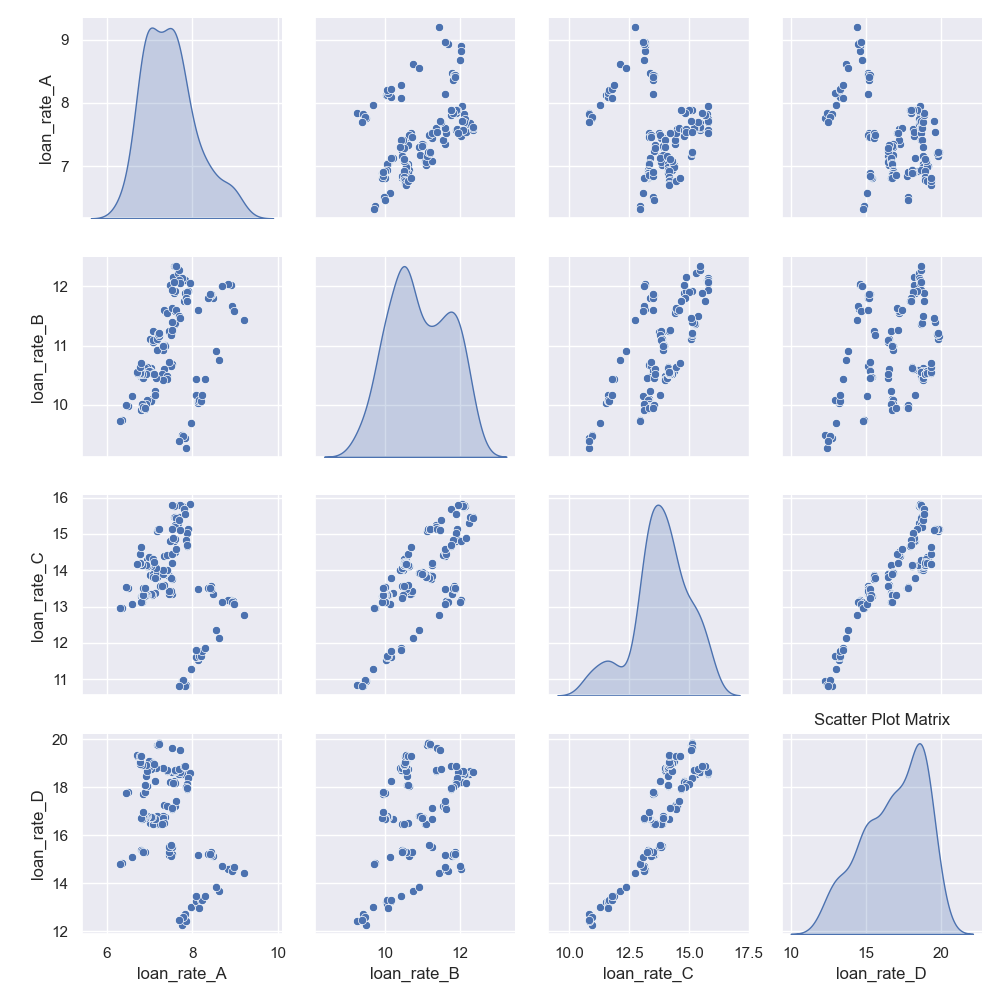
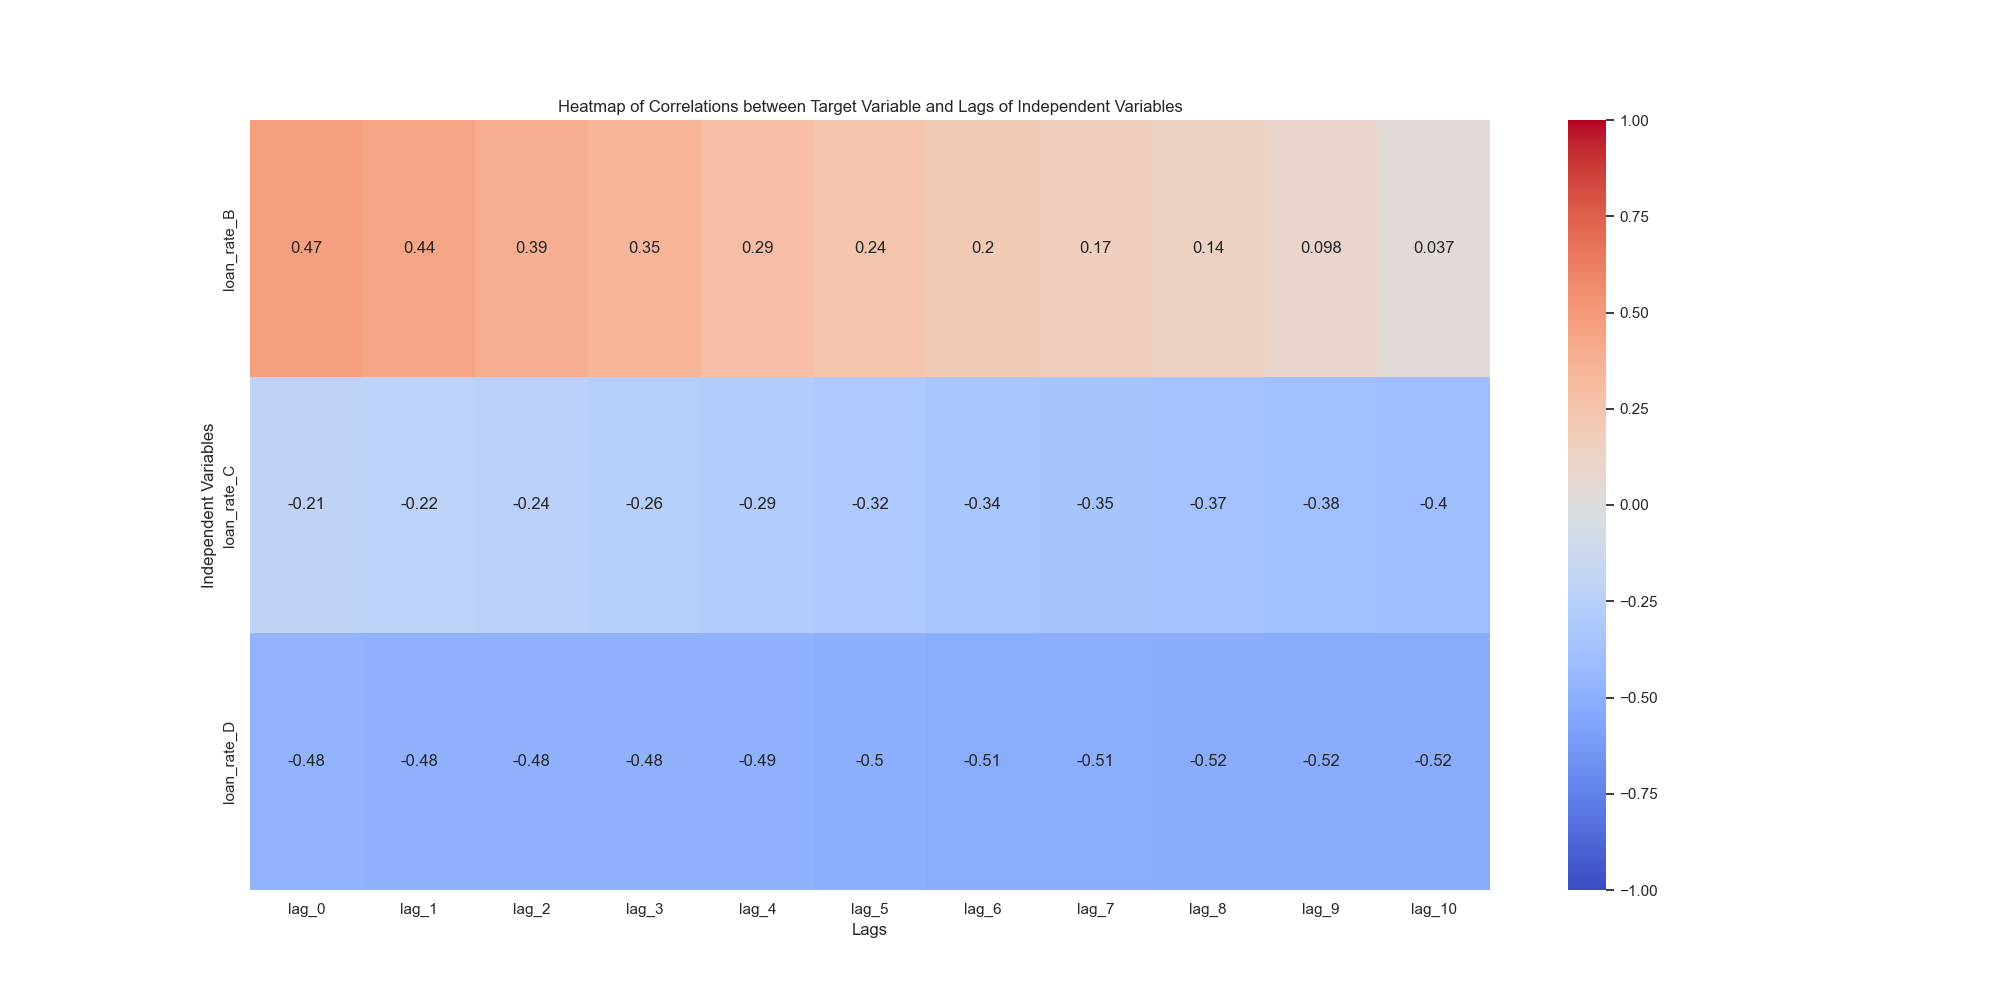
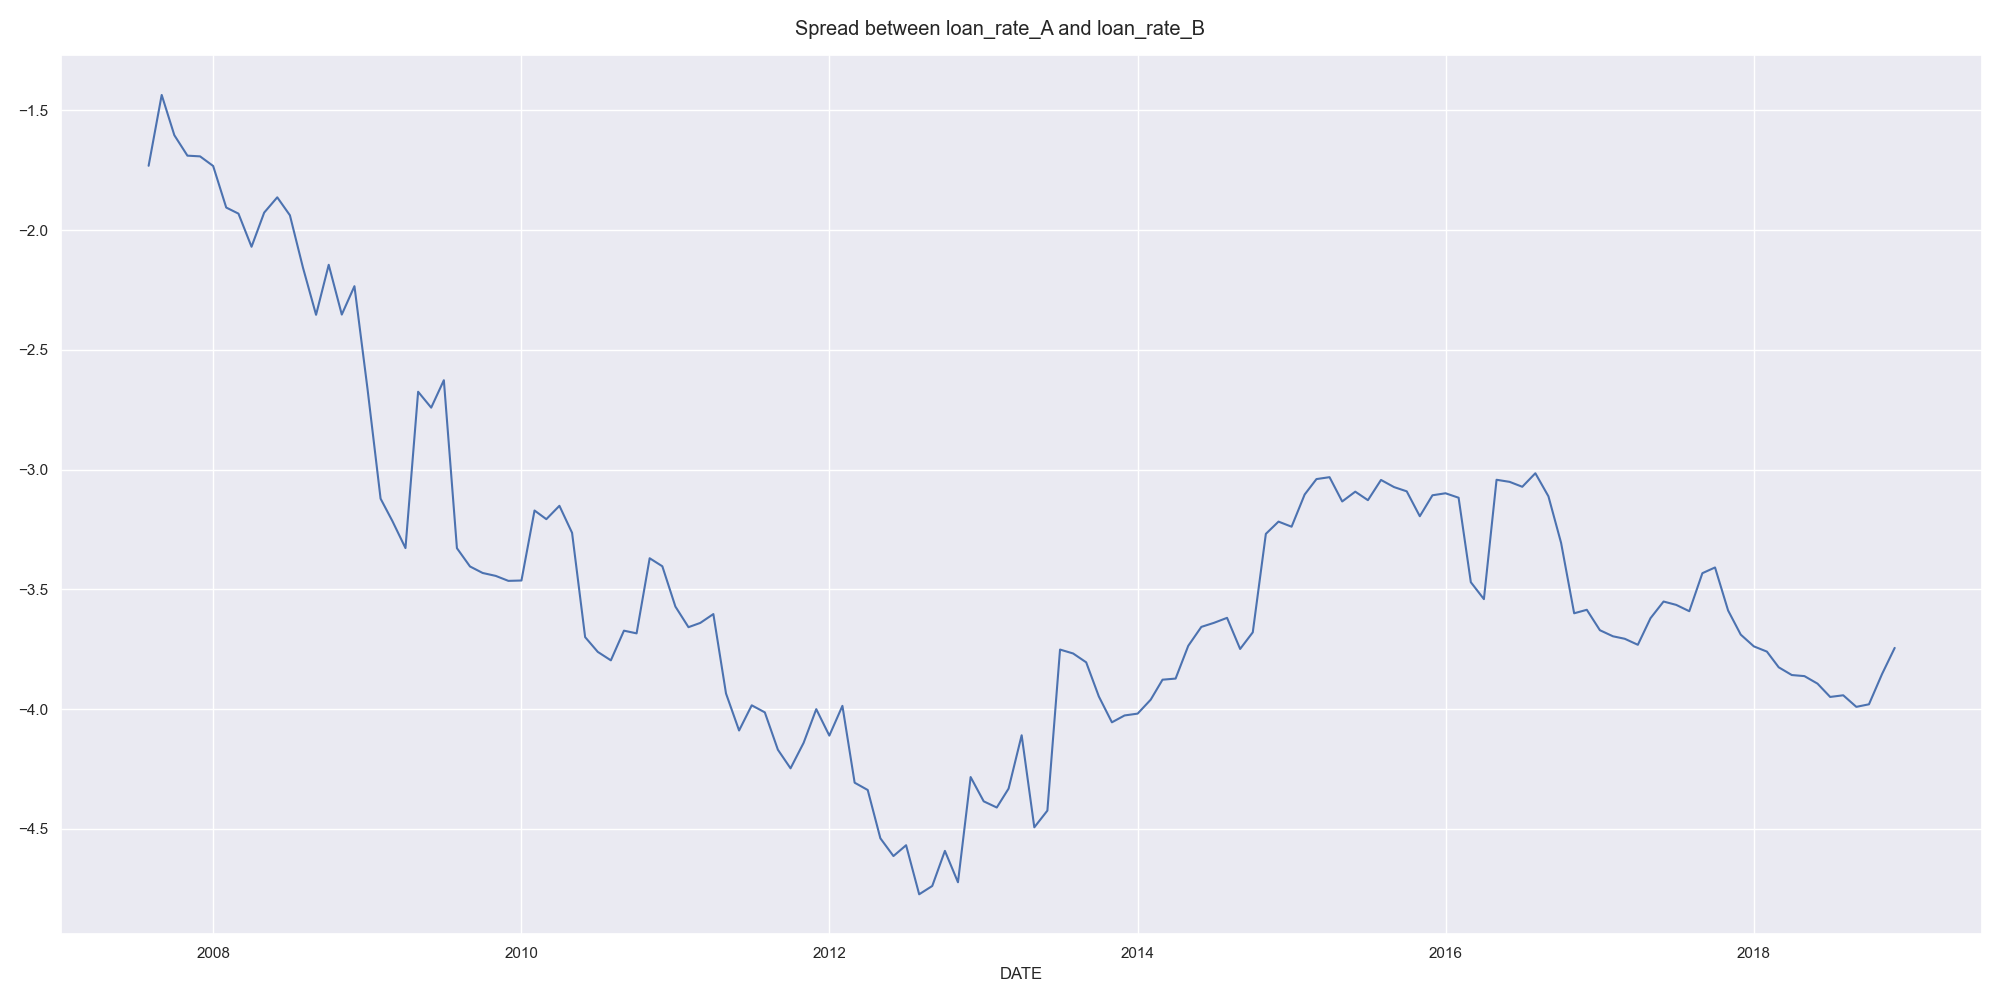
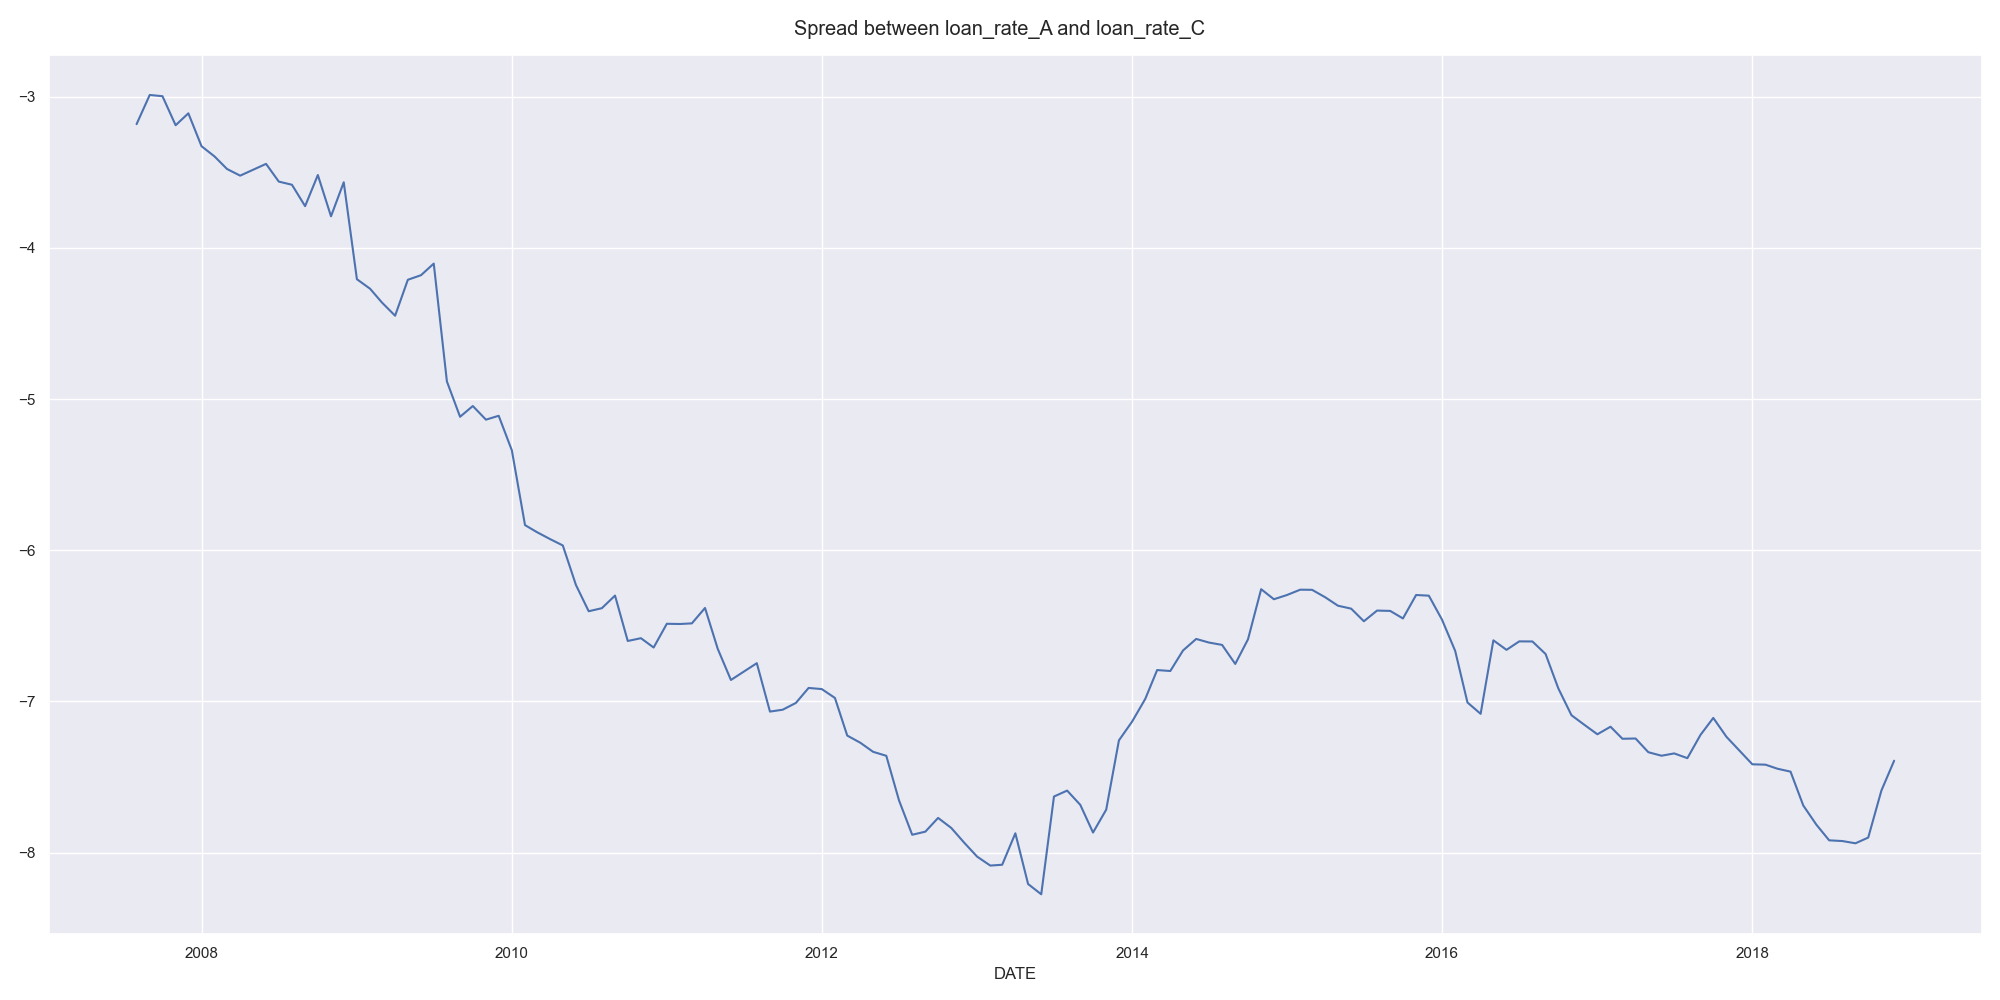
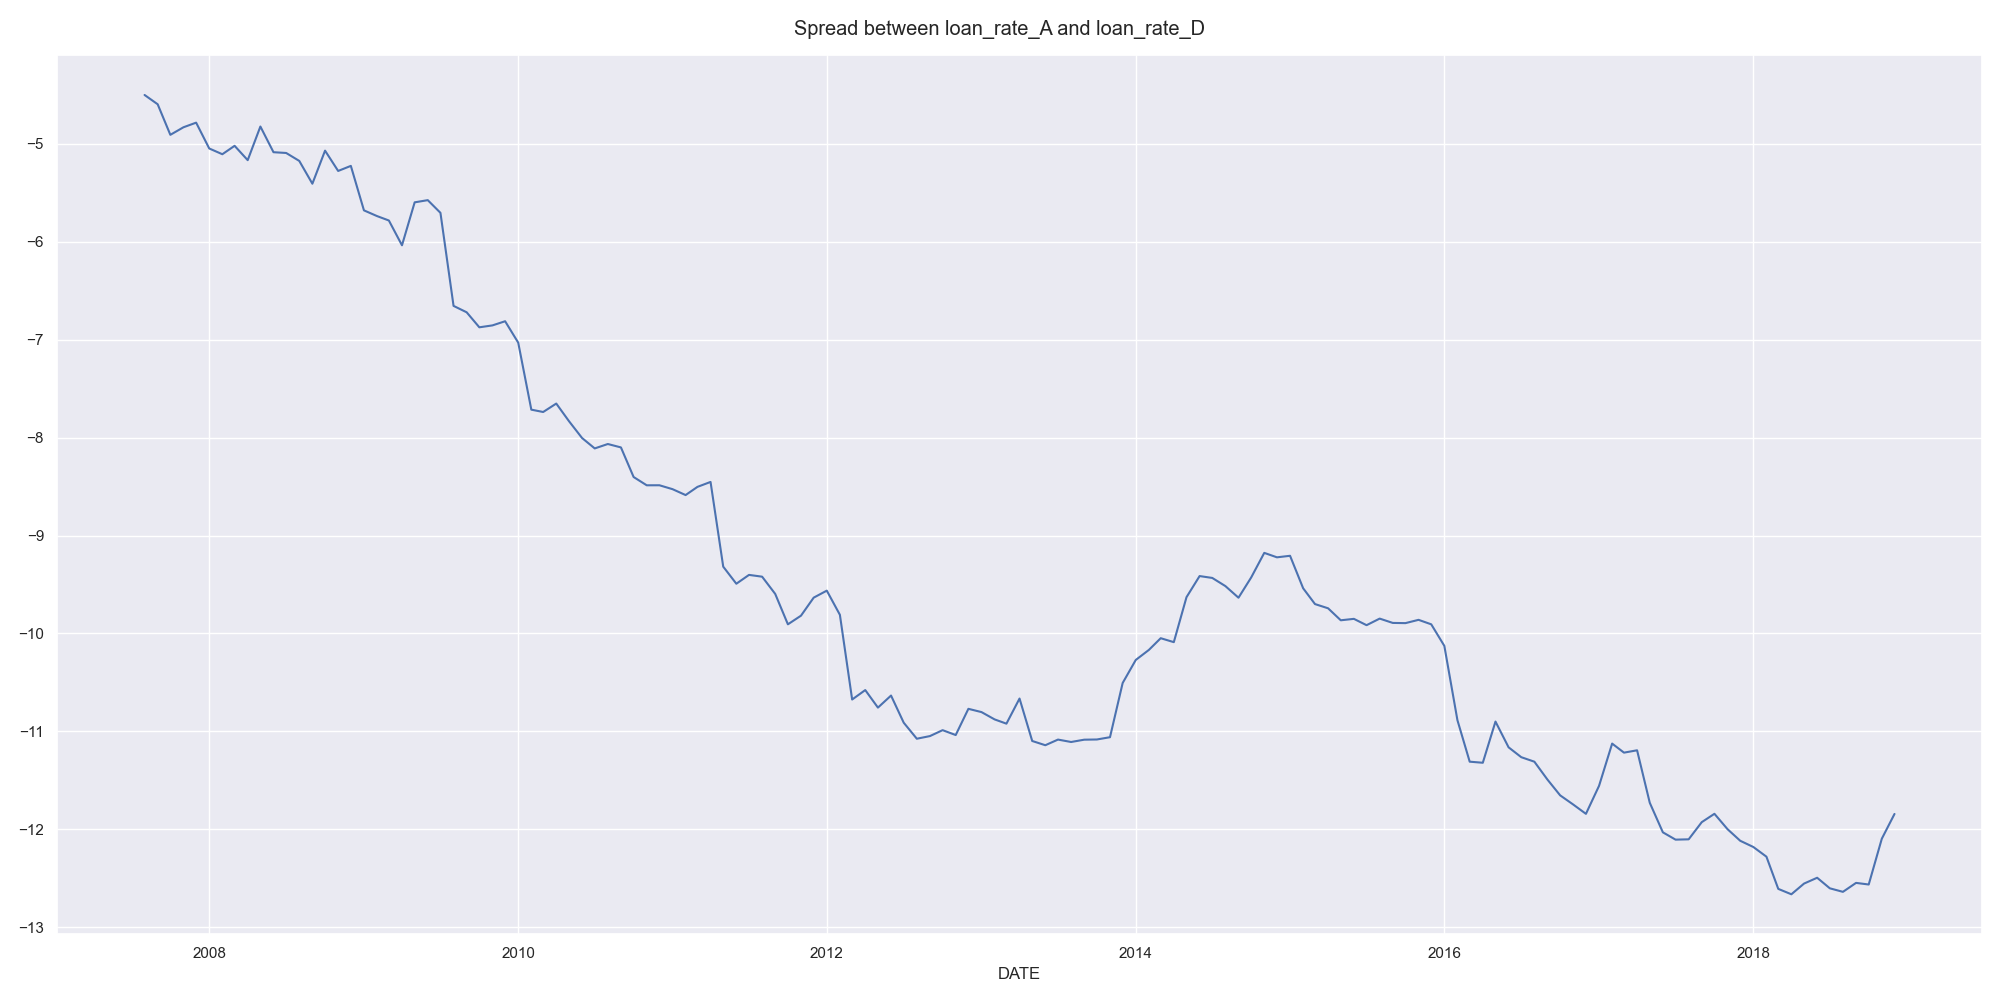
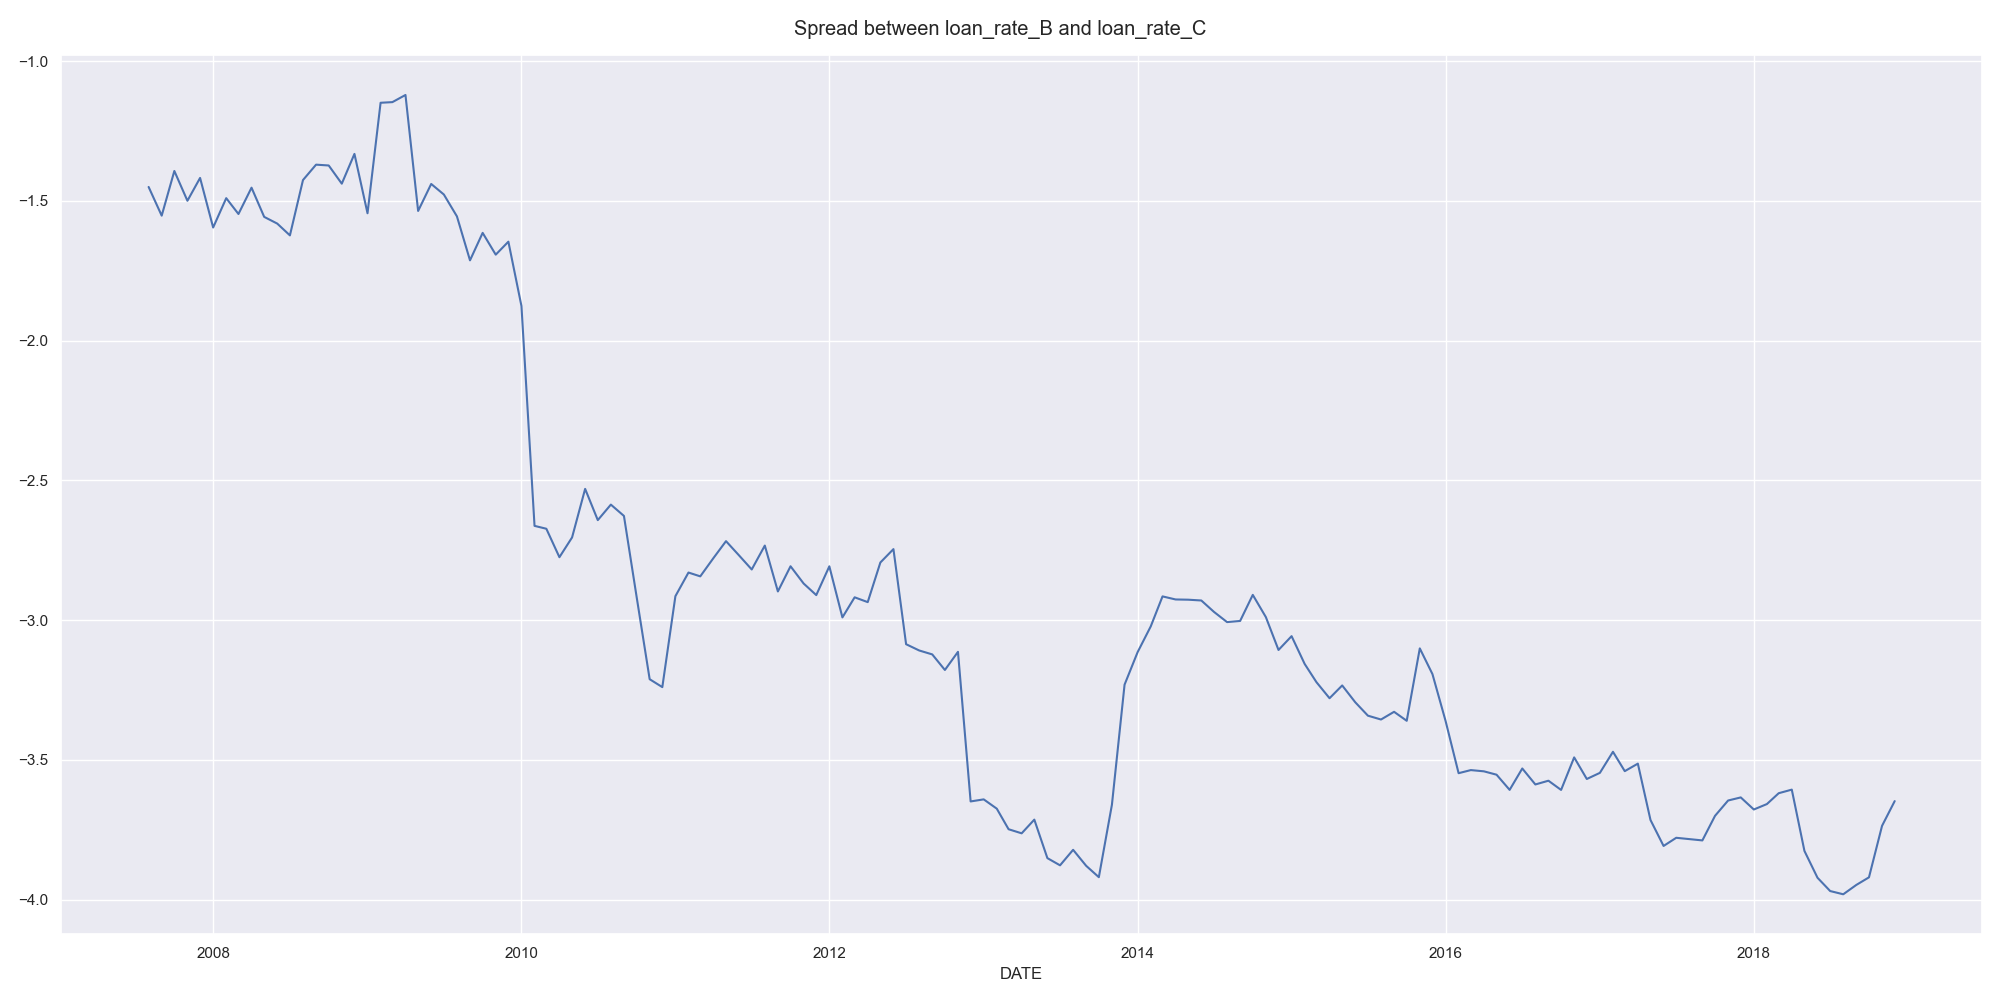
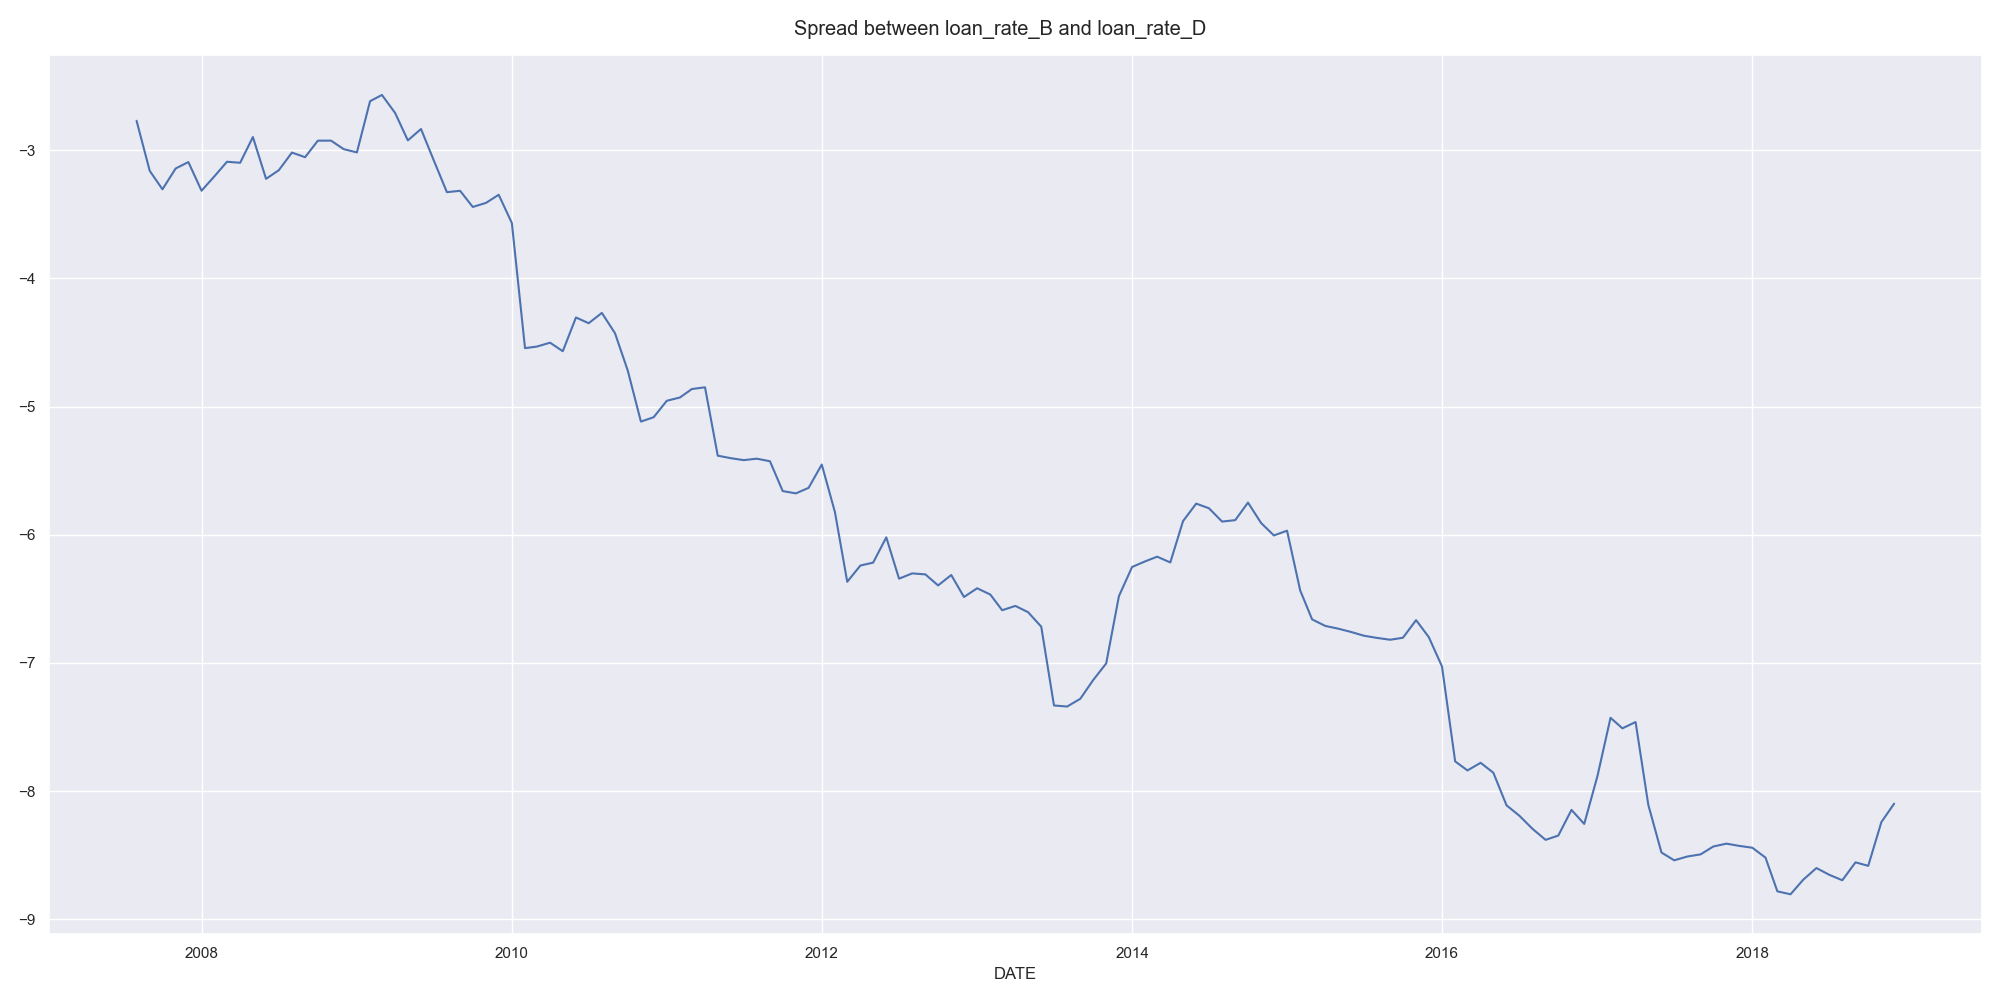
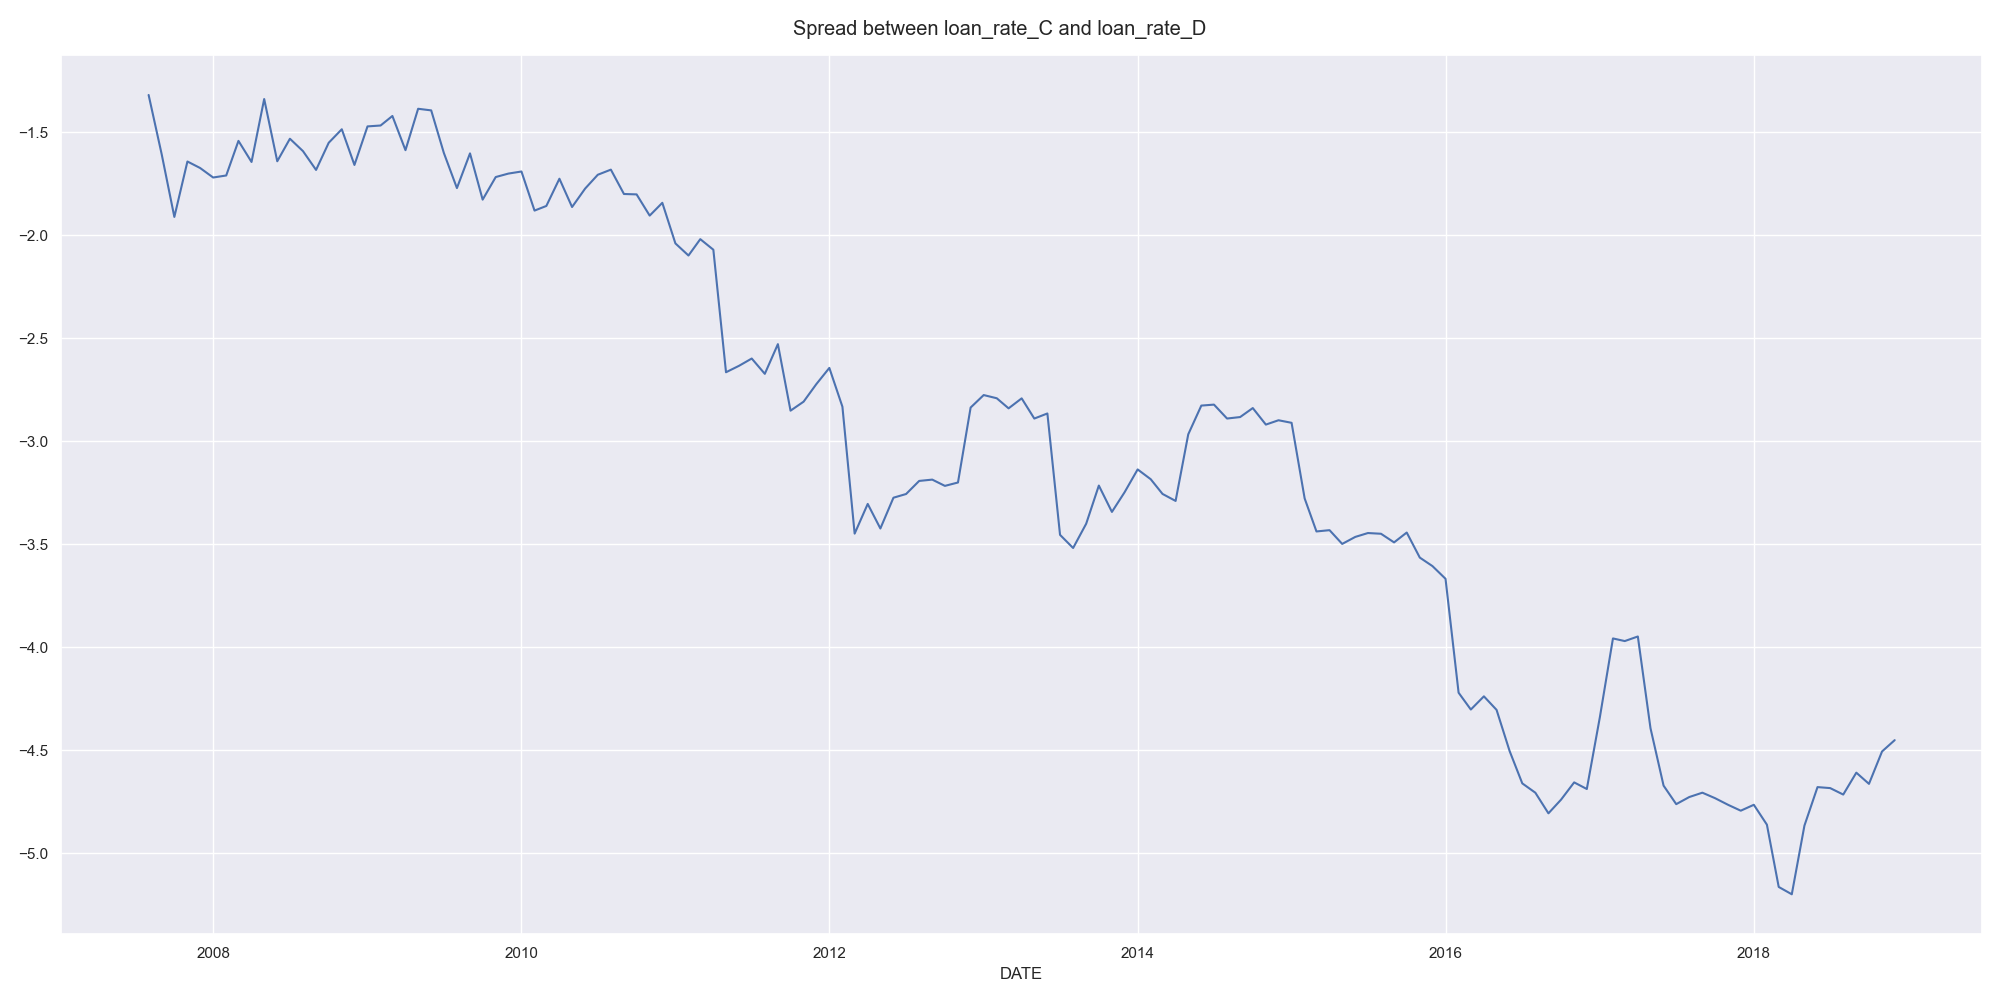

TimeSeriesMultivariate(test_context=TestContext(dataset=Dataset(raw_dataset=            loan_rate_A  loan_rate_B  loan_rate_C  loan_rate_D
DATE                                                          
2007-08-01     7.766667     9.497692    10.947500    12.267000
2007-09-01     7.841429     9.276667    10.829167    12.436667
2007-10-01     7.830000     9.433333    10.825926    12.737368
2007-11-01     7.779091     9.467778    10.967037    12.609444
2007-12-01     7.695833     9.387500    10.805000    12.478889
...                 ...          ...          ...          ...
2018-08-01     7.218997    11.161286    15.142618    19.857603
2018-09-01     7.201281    11.191918    15.139769    19.748459
2018-10-01     7.228498    11.208418    15.129105    19.792163
2018-11-01     7.536897    11.390483    15.126869    19.632697
2018-12-01     7.715209    11.459631    15.107476    19.558346

[137 rows x 4 columns], fields=[{'id': 'loan_rate_A', 'type': 'Numeric'}, {'id': 'loan_rate_B', 'type': 

In [22]:
test_plan_config = {
    "scatter_plot": {
        "columns": target_column + feature_columns
    },
    "lagged_correlation_heatmap": {
        "target_col": target_column,
        "independent_vars": feature_columns
    },
    "engle_granger_coint": {
        "threshold": 0.05
    },
}

vm.run_test_plan("time_series_multivariate", config=test_plan_config, dataset=vm_dataset)